# Introduction and Motivation

I am interested in analyzing the factors that cause loan defaults for small businesses. As I am highly aware of the plights and challenges that small businesses face, especially with the increases in small mom and pop shops closing their doors due to the pandemic, I became fascinated at learning about loan default risks for small businesses. There are two major objectives of this project:<br>
1. To determine the factors that affect whether a small business can pay off their loan in time 
2. Can we can successfully predict whether a small business loan will default based on various factors such as geographical location, the time the loan was approved by the bank, the industry sector the business belongs to, etc?

# Table of Contents
<a href='#1.0'><b><h2>1.0 Project Background<b></a><br>
<a href='#2.0'><b><h2>2.0 Load, Prepare, and Explore Data<b></a><br>
<a href='#2.1'><b><h3>2.1 Load Data<b></a><br>
<a href='#2.2'><b><h3>2.2 Data Cleaning<b></a><br>
<a href='#2.2.1'><b><h4>2.2.1 Feature Preparation<b></a><br>
<a href='#2.2.2'><b><h4>2.2.2 Removing Redundant Columns and Loans with Null Values<b></a><br>
<a href='#2.3'><b><h3>2.3 Exploratory Data Analysis<b></a><br>
<a href='#2.3.1'><b><h4>2.3.1 Summary Statistics<b></a><br>
<a href='#2.3.2'><b><h4>2.3.2 Correlation Analysis<b></a><br>
<a href='#2.3.3'><b><h4>2.3.3 Loan Default Rate Analysis<b></a><br>
<a href='#2.4'><b><h3>2.4 Feature Engineering<b></a><br>
<a href='#3.0'><b><h2>3.0 Machine Learning Modelling<b></a><br>
<a href='#3.1'><b><h3>3.1 Metric Selection<b></a><br>
<a href='#3.2'><b><h3>3.2 Feature Selection and Train, Test, Split<b></a><br>
<a href='#3.3'><b><h3>3.3 Model Development<b></a><br>
<a href='#3.3.1'><b><h4>3.3.1 Logistic Regression<b></a><br>
<a href='#3.3.2'><b><h4>3.3.2 Decision Tree Classifier<b></a><br>
<a href='#3.3.3'><b><h4>3.3.3 Random Forest Classifier<b></a><br>
<a href='#3.3.4'><b><h4>3.3.4 XGBoost<b></a><br>
<a href='#3.3.5'><b><h4>3.3.5 Neural Networks<b></a><br>
<a href='#3.4'><b><h3>3.4 Model Selection<b></a><br>
<a href='#3.5'><b><h3>3.5 Model Interpretation for XGBoost<b></a><br>
<a href='#3.5.1'><b><h4>3.5.1 Using SHAP Library for Enriched Model Interpretation<b></a><br>
<a href='#4.0'><b><h2>4.0 Final Insights and Recommendations<b></a><br>
<a href='#4.1'><b><h3>4.1 Algorithm<b></a><br>
<a href='#4.2'><b><h3>4.2 Recommendations Based on Model Interpretation<b></a><br>
<a href='#4.3'><b><h3>4.3 Considerations<b></a><br>

<a id='1.0'></a>
# 1.0 Project Background

For this project, I am analyzing and predicting whether a loan default will occur for small business loans. The dataset was obtained from Kaggle and consists of data from Small Business Administration (SBA), a US government entity that provides assistance to help small businesses grow. The dataset can be obtained from the Dataset Source below. If the dataset no longer exists, please reach out to me at nathanling9730@gmail.com and I will send it to you accordingly.

SBA Background Source: https://www.investopedia.com/terms/s/small-business-administration.asp

Dataset Source: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied

<a id='2.0'></a>
# 2.0 Load, Prepare, and Explore Data

<a id='2.1'></a>
## 2.1 Load Data

Importing libraries necessary for data cleaning, analysis, and feature engineering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load and see what the data looks like

**Important Note:** Make sure the csv file downloaded from Kaggle is still called 'SBAnational.csv'. Otherwise, rename it.

In [2]:
SBA_loan_data = pd.read_csv('SBAnational.csv')
SBA_loan_data.head(2)

C:\Users\Nathan Ling\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"


Exploring the different columns in the dataset

In [3]:
SBA_loan_data.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

Analyzing the number of rows and columns in this dataset

In [4]:
print(f'The number of rows is {SBA_loan_data.shape[0]} and columns is {SBA_loan_data.shape[1]}.')

The number of rows is 899164 and columns is 27.


Analyzing the data types

**Insights:** Most features are objects, or strings, even for numerical values such as the gross disbursement and balance. They will need to be converted to numeric values later.

In [5]:
SBA_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

Finding all of the null values

**Insights:** Appears ChgOffDate has the most null values. Reason is likely because most loans are not charged off

In [6]:
SBA_loan_data.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

<a id='2.2'></a>
## 2.2 Data Cleaning

<a id='2.2.1'></a>
### 2.2.1 Feature Preparation

This section entails exploring the different values as well as the frequencies within each feature to identify values such as "unknown" or other non sensical values (eg. a value of "R" for a feature which only takes "Y" for yes or "N" for no). These values will be converted to null values as they are equivalent to nulls since they do not provide insights into the data.

Other data cleaning includes converting data to the right format (eg. removing "$" signs from numeric columns and then converting to floats) so that we can visualize trends and the ML models can properly ingest the data.

Finally, certain features are bucketed into categories for further analysis (eg. month, sector).

Filtering out the database to **ONLY** include labels that are not null.

**Insights:** Only a small amount of data had null output values

In [7]:
SBA_loan_data = SBA_loan_data[pd.notna(SBA_loan_data['MIS_Status'])]
print(f'The number of rows is {SBA_loan_data.shape[0]} and columns is {SBA_loan_data.shape[1]}.')

The number of rows is 897167 and columns is 27.


Finding out how imbalanced the output variable is. "P I F" represents paid in full, meaning the conditions of the loan were honoured. On the other hand, "CHGOFF" represents a delinquent loan that will not ever be paid off, meaning the loan was bad.

In [8]:
SBA_loan_data['MIS_Status'].unique()

array(['P I F', 'CHGOFF'], dtype=object)

Replacing the MIS_Statuses with 0s and 1s.

In [9]:
SBA_loan_data['MIS_Status'] = SBA_loan_data['MIS_Status'].map({'P I F': 0, 'CHGOFF': 1})

Finding all the unique company names, banks, different cities, zip codes, and states (company and bank states)

**Insights:** Given that there's nearly 780000 different companies, 6000 banks, 33000 unique cities, and 34000 zip codes it would be very difficult to bucket these attributes into a form that the ML algorithms can use.

In [10]:
for column in ['Name', 'Bank', 'City', 'Zip', 'State', 'BankState']:
    print(f'{column} column has {SBA_loan_data[column].nunique()} unique values')

Name column has 778679 unique values
Bank column has 5801 unique values
City column has 32566 unique values
Zip column has 33602 unique values
State column has 51 unique values
BankState column has 56 unique values


Analyzing the different franchise codes

In [11]:
SBA_loan_data['FranchiseCode'].unique()

array([    1,     0, 15100, ...,  2899, 18701, 15930], dtype=int64)

We can create a new feature, whether the borrower of the loan belongs to a franchise or not. Given that we know that franchise codes of 1 or 0 means no franchise, we can use this information to create this feature. Being a franchisee has specific benefits, such as support from the franchisor. This can affect business success and hence influence loan default risk.

In [12]:
SBA_loan_data['Franchised_or_Not'] = SBA_loan_data['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)

Counting the proportion of urban to rural

**Insights:** There is a very large proportion of businesses that are not specified as rural nor urban, as indicated by the large number of 0s

In [13]:
SBA_loan_data['UrbanRural'].unique()

array([0, 1, 2], dtype=int64)

Replacing 0 as null for UrbanRural as 0 is undefined.

**Important Note:** Undefined could have various meanings. Undefined could refer to the fact that the business is not strictly rural nor urban. However, undefined could also be interpreted as the result of poor data collection, of which we simply do not know whether the business is urban, rural, both, or neither. This is the worst case scenario and making an inference for this second scenario would introduce noise into the data and thus negatively affect the accuracy as well as the validity of the model results later on. Thus, it would be safer to treat values of 0 as nulls.

Afterwards, we subtract by 1 so that it could be treated as a categorical value during model deployment.

**Insights:** The majority of businesses are urban

In [14]:
SBA_loan_data['UrbanRural'] = SBA_loan_data['UrbanRural'].replace(0, np.nan)
SBA_loan_data['UrbanRural'] = SBA_loan_data['UrbanRural'] - 1

Finding the frequency of businesses that are under the LowDoc loan program.

**Insights:** There is a small fraction of loans that are not "No" or "Yes", suggesting the values of 0, C, S, A, R, and 1 may need to be interpreted as unknown, hence null values.

In [15]:
SBA_loan_data['LowDoc'].unique()

array(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'], dtype=object)

Replacing 'N' and 'Y' with 0 and 1 respectively, and assigning the other values to nulls.

**Important Note:** The reason why only 'N's and 'Y's are assigned to 0s and 1s are because the dataset description only mentions 'N' and 'Y's. Making assumptions about the values that do not fall under these two categories may be risky and introduce noise into the data and affect the accuracy and validity of the model later on.

In [16]:
SBA_loan_data['LowDoc'] = SBA_loan_data['LowDoc'].map({
    'N': 0,
    'Y': 1
    })

Finding the proportion of businesses that utilize a revolving line of credit.

**Insights:** Similar to LowDoc, there are a significant number of businesses that have an unknown status for revolving line of credit, indicated by the values other than a 'N' or a 'Y', which represent No and Yes respectively for revolving line of credit.

In [17]:
SBA_loan_data['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

Replacing 'N' and 'Y' with 0 and 1 respectively, and assigning the other values to nulls.

In [18]:
SBA_loan_data['RevLineCr'] = SBA_loan_data['RevLineCr'].map({
    'N': 0,
    'Y': 1
})

We are interested in bucketing the NAICS into the various business sectors to engineer a new feature. We believe this will be very helpful for model performance.

Extracting the first two numbers of the NAICS.

In [19]:
SBA_loan_data['NAICS_Sector'] = SBA_loan_data['NAICS'].astype(str).apply(lambda x: x[:2])

Assigning the two digit NAICS codes to sector names. Any NAICS code of 0 is replaced with null values

In [20]:
SBA_loan_data['NAICS_SectorName'] = SBA_loan_data['NAICS_Sector']\
.astype(int).map({11: 'Agriculture, Forestry, Fishing & Hunting', 21: 'Mining, Quarying, Oil & Gas',
                22: 'Utilities', 23: 'Constuction', 31: 'Manufacturing', 32: 'Manufacturing', 33: 'Manufacturing',
                42: 'Wholesale Trade', 44: 'Retail Trade', 45: 'Retail Trade', 48: 'Transportation & Warehousing',
                49: 'Transportation & Warehousing', 51: 'Information', 52: 'Finance & Insurance', 
                53: 'Real Estate, Rental & Leasing', 54: 'Professional, Scientific & Technical Service',
                55: 'Management of Companies & Enterprise', 
                56: 'Administrative, Support, Waste Management & Remediation Service',
                61: 'Educational Service', 62: 'Health Care & Social Assistance',
                71: 'Arts, Entertainment & Recreation', 72: 'Accomodation & Food Service',
                81: 'Other Services (Except: Public Administration)', 92: 'Public Administration'
               })

Finding the ApprovalFY values to see if data cleaning is necessary

**Insights:** Given that some values are integers and others are strings, as well as the 1976A value, there needs to be data cleaning applied. We also see that the earliest year a loan was approved was in 1966 and the latest in 2014.

In [21]:
SBA_loan_data['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1966, 1983, 1973, 1984, 2007, 1985, 1986,
       1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992,
       1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004',
       '1994', '1979', '1976', '1975', '1974', '1977', '1981', '1982',
       '1983', '1984', '1978', '1980', '1968', '1976A', '1969', '1995',
       '1970', '2005', '1996', '1971', 1996, 1971], dtype=object)

Removing the 'A' value and converting everything to int

In [22]:
SBA_loan_data['ApprovalFY'] = \
SBA_loan_data['ApprovalFY'].astype(str).apply(lambda x: x.replace('A', '')).astype(int)

Seeing what the approval date column looks like to see how we can create new features, such as the month, in this column

**Insights:** Follows a "DD-MMM-YY" format.

In [23]:
SBA_loan_data['ApprovalDate'].head()

0    28-Feb-97
1    28-Feb-97
2    28-Feb-97
3    28-Feb-97
4    28-Feb-97
Name: ApprovalDate, dtype: object

We create a new feature, the month column, based on the approval date. We are interested to assess whether seasonal patterns affect loan defaults

In [24]:
SBA_loan_data['Month'] = SBA_loan_data['ApprovalDate'].apply(lambda x: x.split('-')[1])

For the following features of ChgOffPrinGr, GrAppv, SBA_Appv, DisbursementGross, BalanceGross, we are transforming the format to a numerical value for further analysis by removing the string of '$' and ','

In [25]:
columns = ['ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross']
for column in columns:
    SBA_loan_data[column] = \
    SBA_loan_data[column].apply(lambda x: x[1:]).apply(lambda x: x.replace(',', '')).astype(float)

Finding out the distinct values for NewExist column

In [26]:
SBA_loan_data['NewExist'].unique()

array([ 2.,  1.,  0., nan])

Replacing NewExist values of 0 to none as 1 represents not new and 2 represents new, 0 does not meaning anything in this context, hence could be treated as a null value. We further subtract this column by 1 so that it could be treated as a categorical value during model development.

In [27]:
SBA_loan_data['NewExist'] = SBA_loan_data['NewExist'].replace(0, np.nan)
SBA_loan_data['Is_New_Business'] = SBA_loan_data['NewExist'] - 1

Converting approval date to a datetime object so that potentially new time based features could be created.

In [28]:
SBA_loan_data['ApprovalDate'] = pd.to_datetime(SBA_loan_data['ApprovalDate'])

We can create a new feature that determines whether the approval date of the loan was part of a recession or not.

Source: https://www.investopedia.com/articles/economics/08/past-recessions.asp

In [29]:
SBA_loan_data['Recession'] = \
((SBA_loan_data['ApprovalDate'] >= '2001-03-01') & (SBA_loan_data['ApprovalDate'] <= '2001-11-30')) |\
((SBA_loan_data['ApprovalDate'] >= '2007-12-01') & (SBA_loan_data['ApprovalDate'] <= '2009-06-30'))

SBA_loan_data['Recession'] = SBA_loan_data['Recession'].astype(int)

<a id='2.2.2'></a>
### 2.2.2 Removing Redundant Columns and Loans with Null Values

Dropping the ChgOffDate as this feature only has values where there are defaults. While this is useful for EDA purposes, it does not help with the machine learning models. I have **not dropped** the charged off amount to understand the severity of a default if it were to occur. Finally, the primary key, LoanNr_ChkDgt was dropped as it cannot be used as a feature for machine learning.

Despite the company name, city, zip code, bank name, disbursement date, amount approved by bank, and amount guaranteed by SBA not being used in the model, I have decided not to drop these columns because they could potentially be used as features in the future.

In [30]:
SBA_loan_data.drop(columns=['LoanNr_ChkDgt', 'ChgOffDate'], inplace=True)

Seeing how many null values there are after data cleaning

**Insights:** After cleaning the data, there are many more null values. This is because there are many data points that do not have any semantic meaning and hence do not provide insight into the underlying business trends 

In [31]:
SBA_loan_data.isnull().sum()

Name                     14
City                     30
State                    13
Zip                       0
Bank                   1506
BankState              1513
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist               1162
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural           322826
RevLineCr            277255
LowDoc                 5999
DisbursementDate       2175
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
Franchised_or_Not         0
NAICS_Sector              0
NAICS_SectorName     201667
Month                     0
Is_New_Business        1162
Recession                 0
dtype: int64

Dropping the null values to assess how many rows remain

**Insights:** Given that there are still nearly 350000 values to work with, dropping the null values is unlikely to affect the model performance.

**Important Note:** Because there are nearly 350000 values to work with, we still have plenty of data to work with even after removing nearly half of the original dataset's rows. I believe that running imputations on null values is not worth having more data to work with as imputing values introduces noise and could lead to misleading results. Thus, in summary, the reason I prefer removing values rather than imputing is because there is enough data to work with even after removing values.

In [32]:
SBA_loan_data.dropna().shape

(348537, 31)

Dropping all the null values

In [33]:
SBA_loan_data.dropna(inplace=True)

<a id='2.3'></a>
## 2.3 Exploratory Data Analysis

<a id='2.3.1'></a>
### 2.3.1 Summary Statistics

This section will explore the trends within the data, such as identifing min, max, median values, and distributions of the numeric features using histograms as well as the proportions for categorical features using bar plots. <br><br>

Finding out whether the timeline for the data has been altered after removing all the null values

**Insights:** It appears the missing values issue is systematic. Given that the years before 1994 all had missing values. Could be record keeping related problems. Thus, a new timeframe (1994 to 2014) will be analyzed and used for the ML models, rather than 1966 to 2014. 

**Important Note:** This could have significant implications on model performance and model interpretation as business laws, trends, and economic situations will likely be different after the '90s compared to before.

In [34]:
SBA_loan_data['ApprovalFY'].agg(columns={'min', 'max'})

columns  min    1994
         max    2014
Name: ApprovalFY, dtype: int64

Creating a function to build plots

In [35]:
def create_plots(df, column):
    df[column].value_counts(normalize=True).plot(kind='bar');
    plt.rcParams["figure.figsize"] = (40,10)
    plt.rcParams.update({'font.size': 30})
    plt.rc('xtick', labelsize=30)   
    plt.title(f'Proportion of Loans by {column}');
    plt.xlabel(column);
    plt.ylabel('Fraction of Total Loans');

Visualizing the percentage of loan defaults.

**Insights:** Imbalanced dataset with over 25% of defaults.

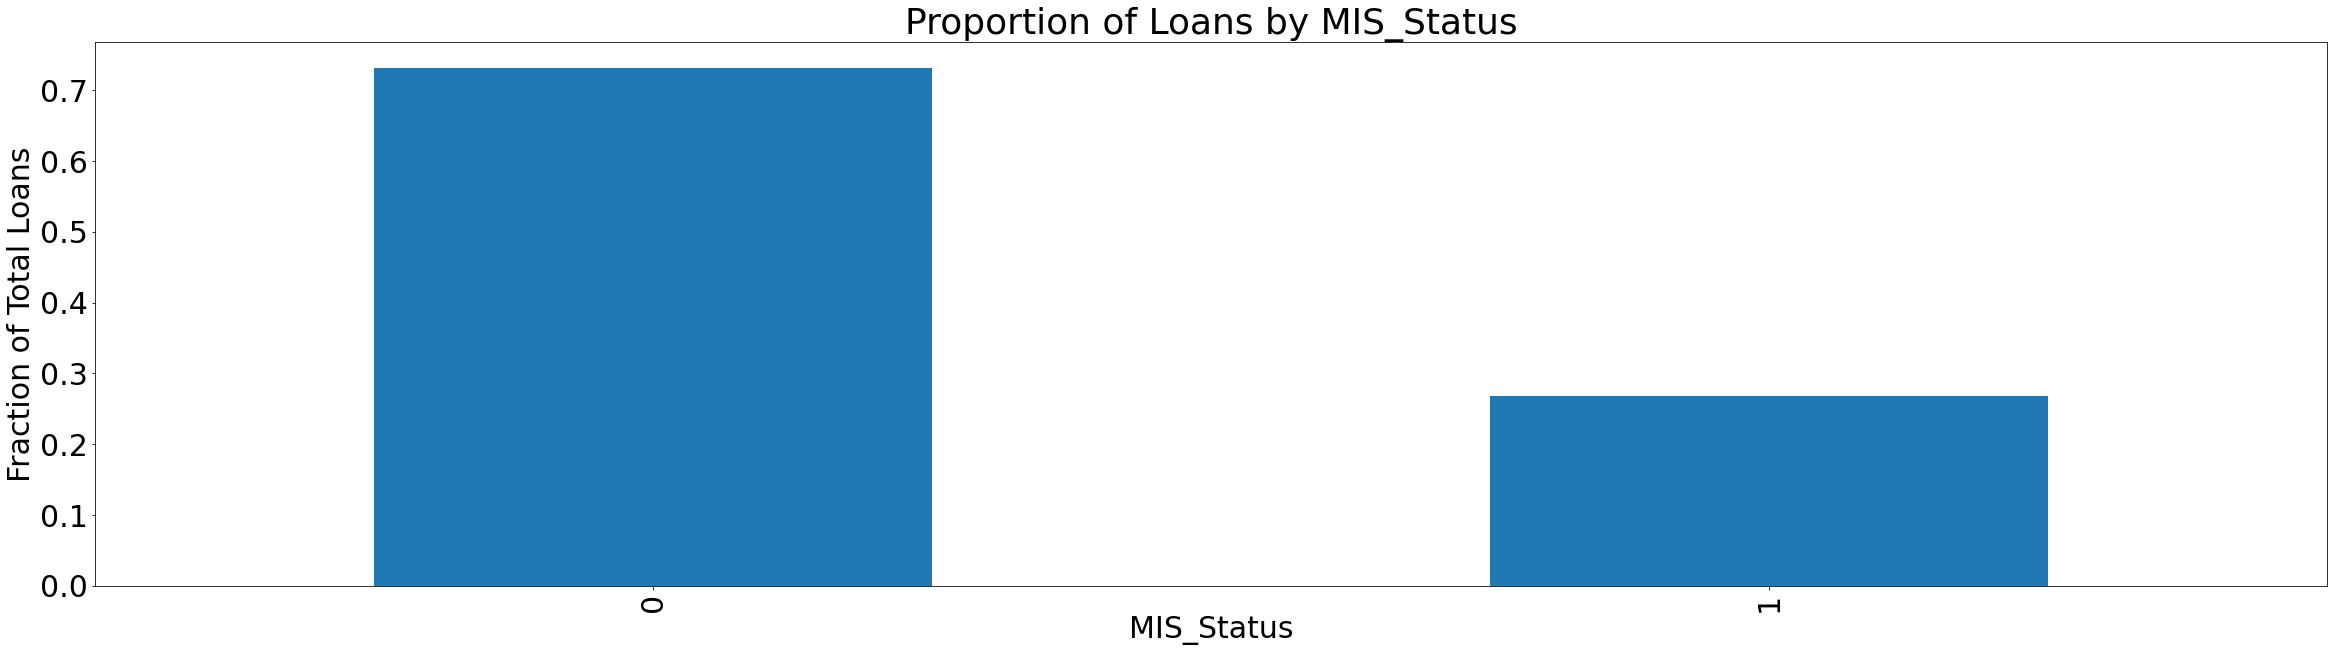

In [78]:
create_plots(SBA_loan_data, 'MIS_Status')

Analyzing the frequency of new to not new businesses

**Insights:** The majority of businesses are not new

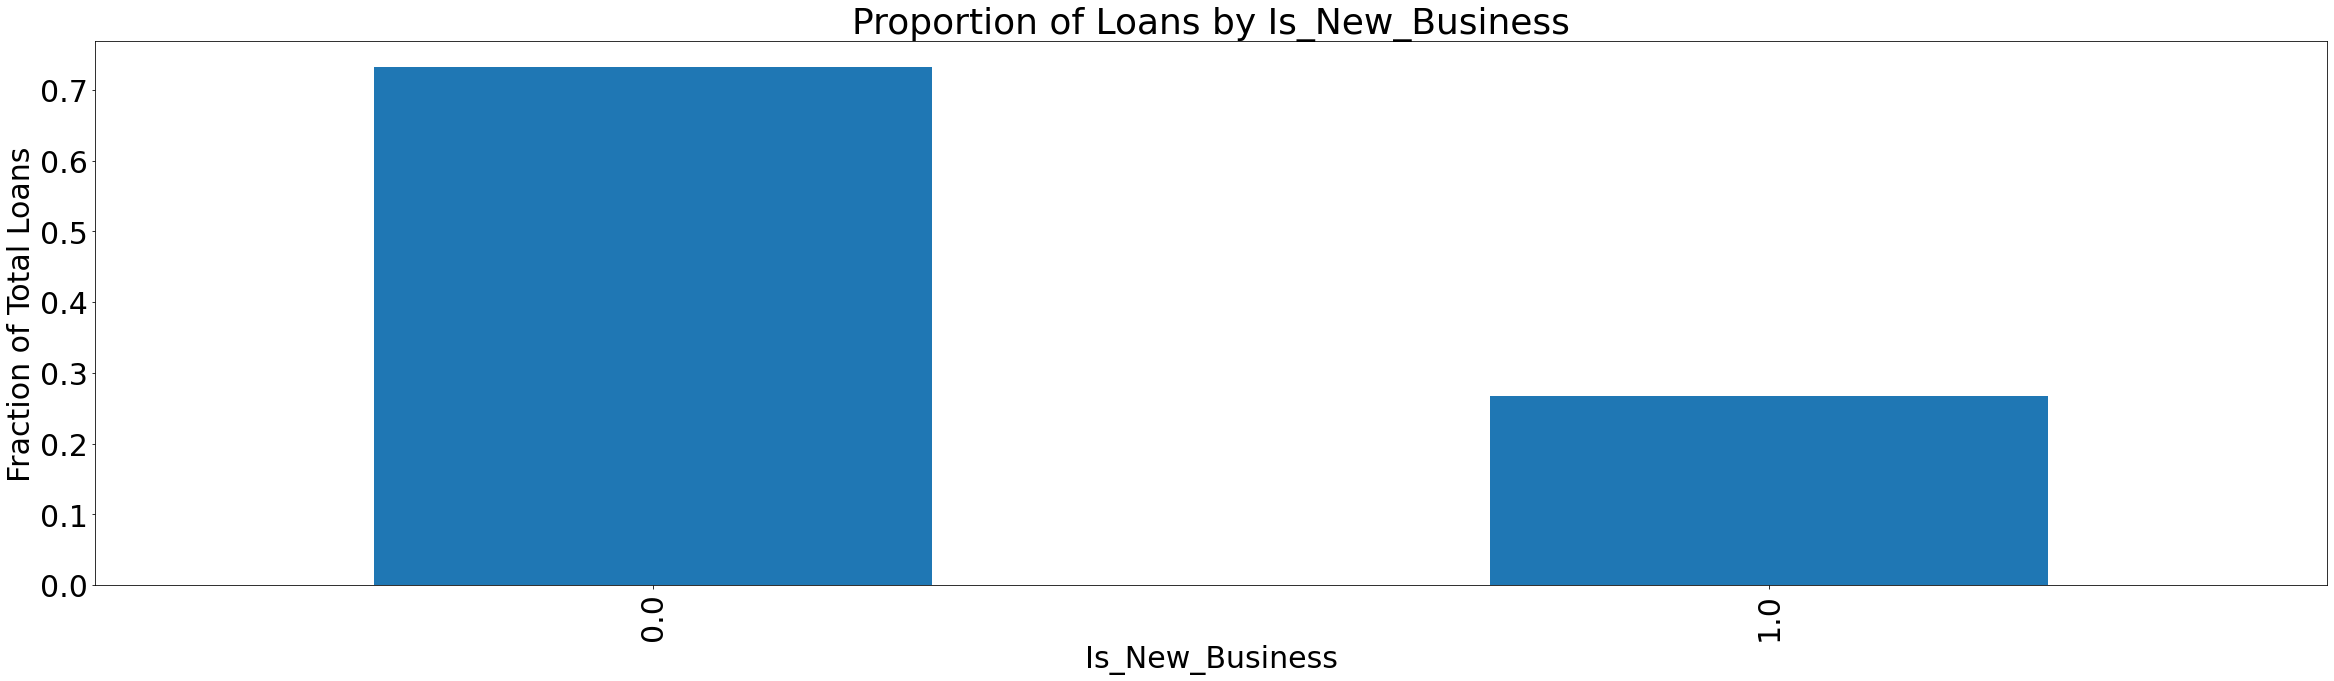

In [37]:
create_plots(SBA_loan_data, 'Is_New_Business')

Analyzing the frequency of franchise vs non franchised businesses.

**Insights:** The majority of businesses aren't franchised. This makes sense as we are analyzing small businesses, which tend not to be franchised.

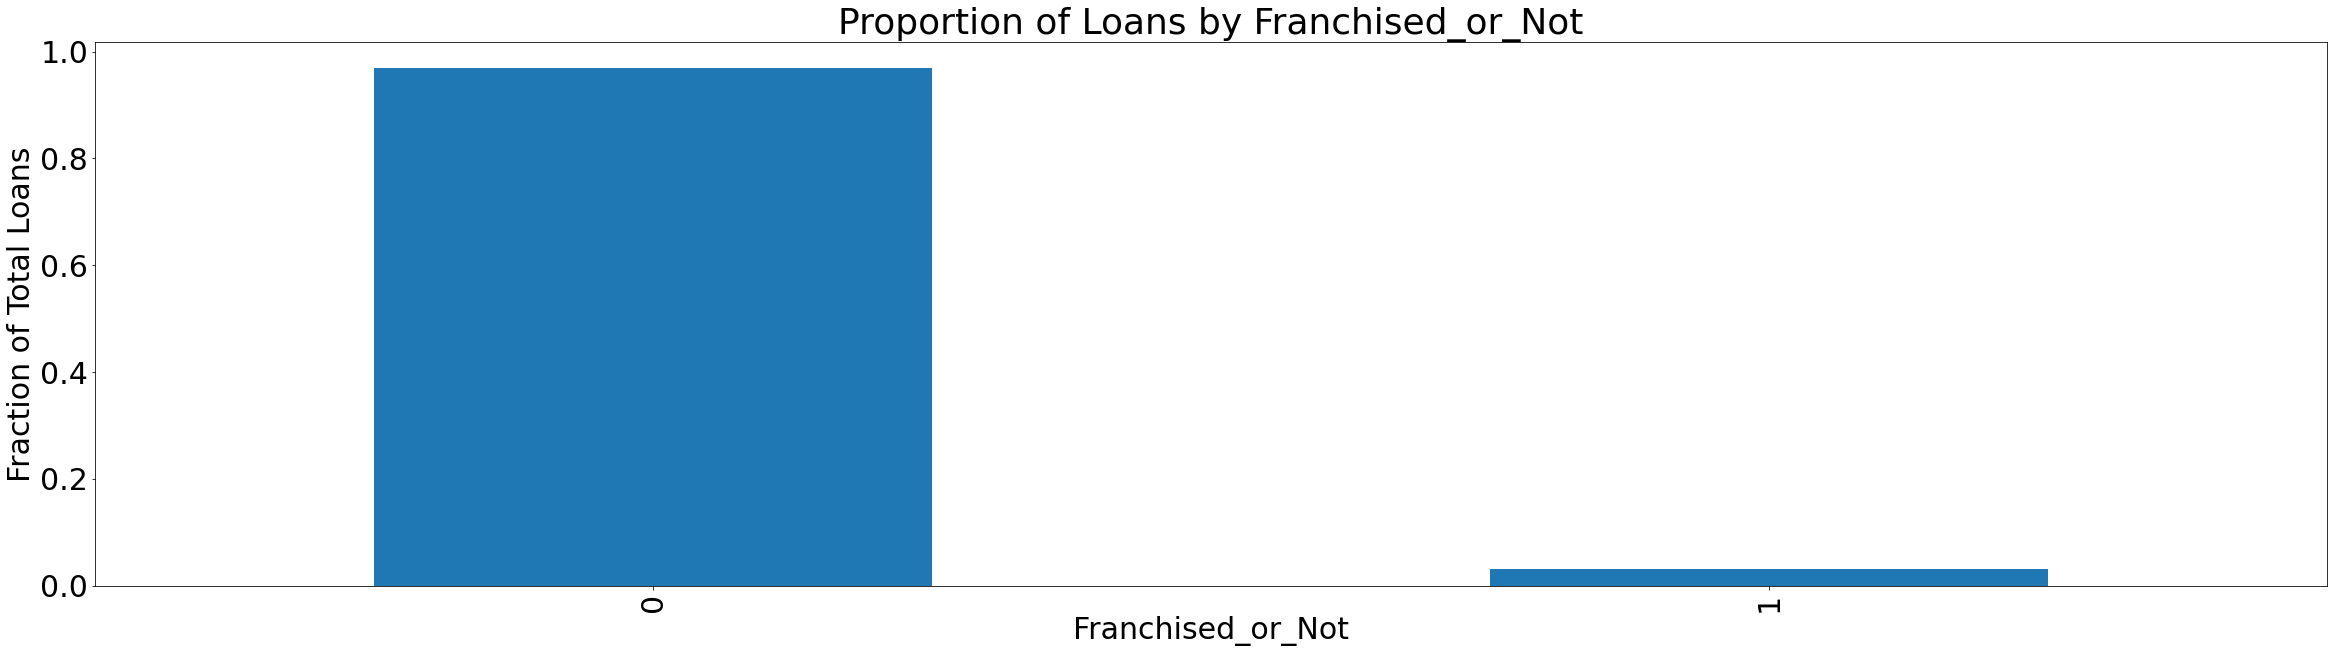

In [38]:
create_plots(SBA_loan_data, 'Franchised_or_Not')

Analyzing the frequency of loans that were part of a recession.

**Insights:** The majority of loans happened outside of a recession.

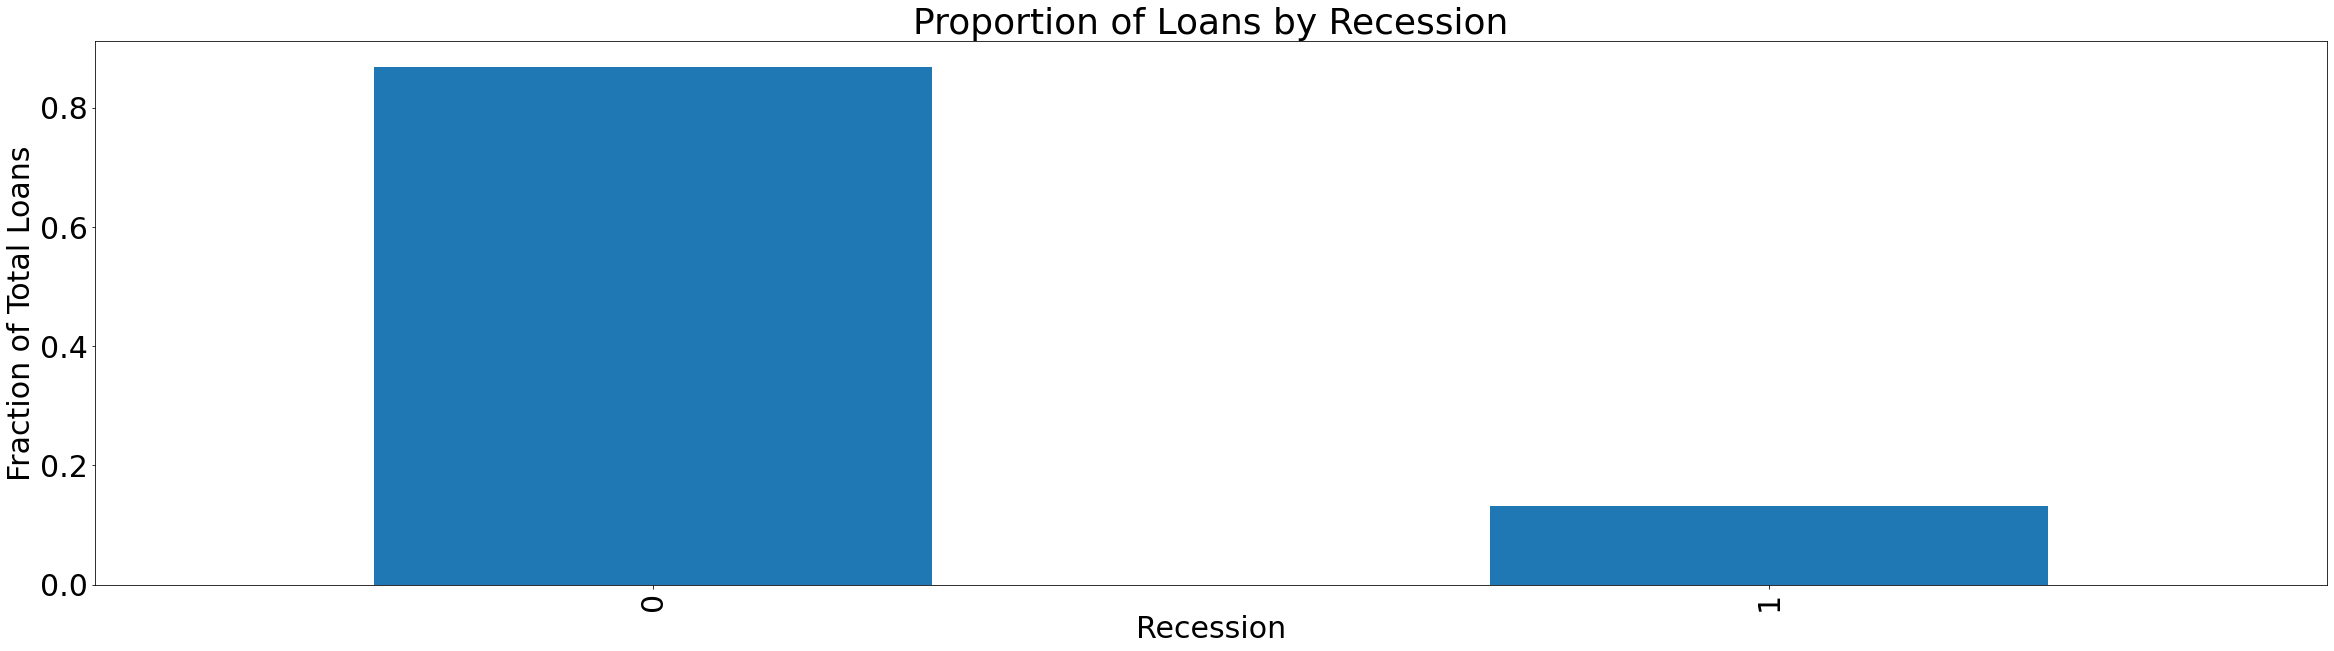

In [39]:
create_plots(SBA_loan_data, 'Recession')

Finding the distributions of businesses by location.

**Insights:** California has the highest number of loans, followed by New York, Texas, and Florida. This makes sense as these 4 states have the highest populations, with California being the most populous state. Hence, business and loan activity is likely to be the highest.

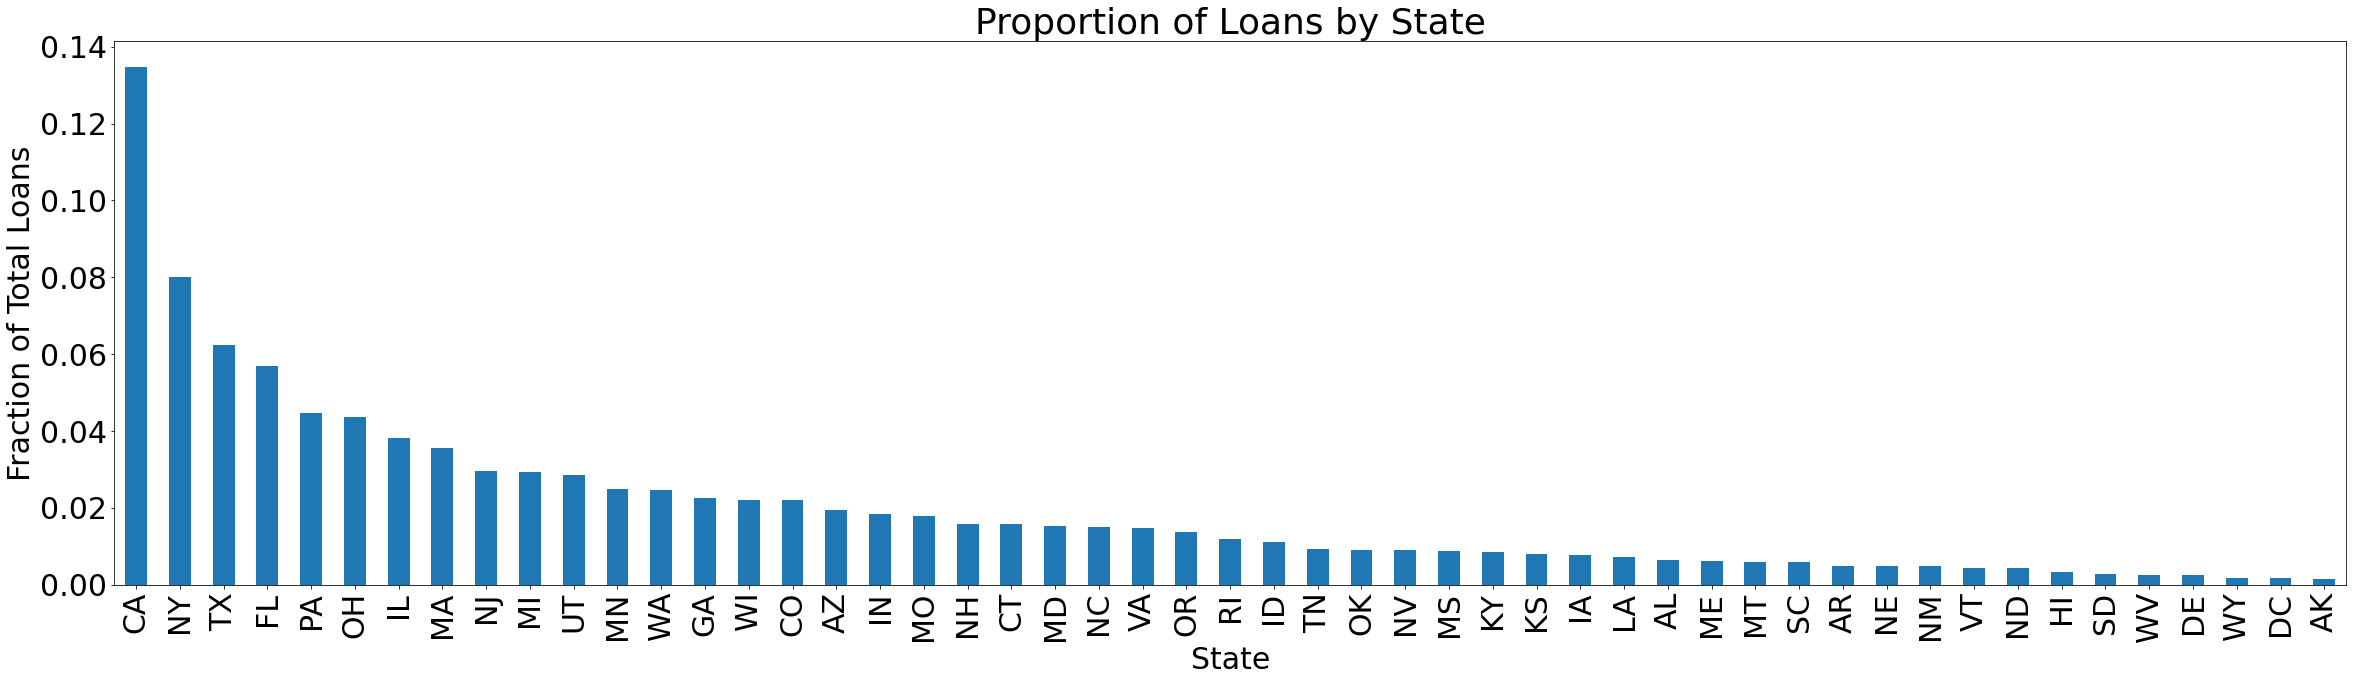

In [40]:
create_plots(SBA_loan_data, column='State')

Getting the proportion of loan activity by Sector

**Insights:** The highest number of loans belong to the retail trade sector

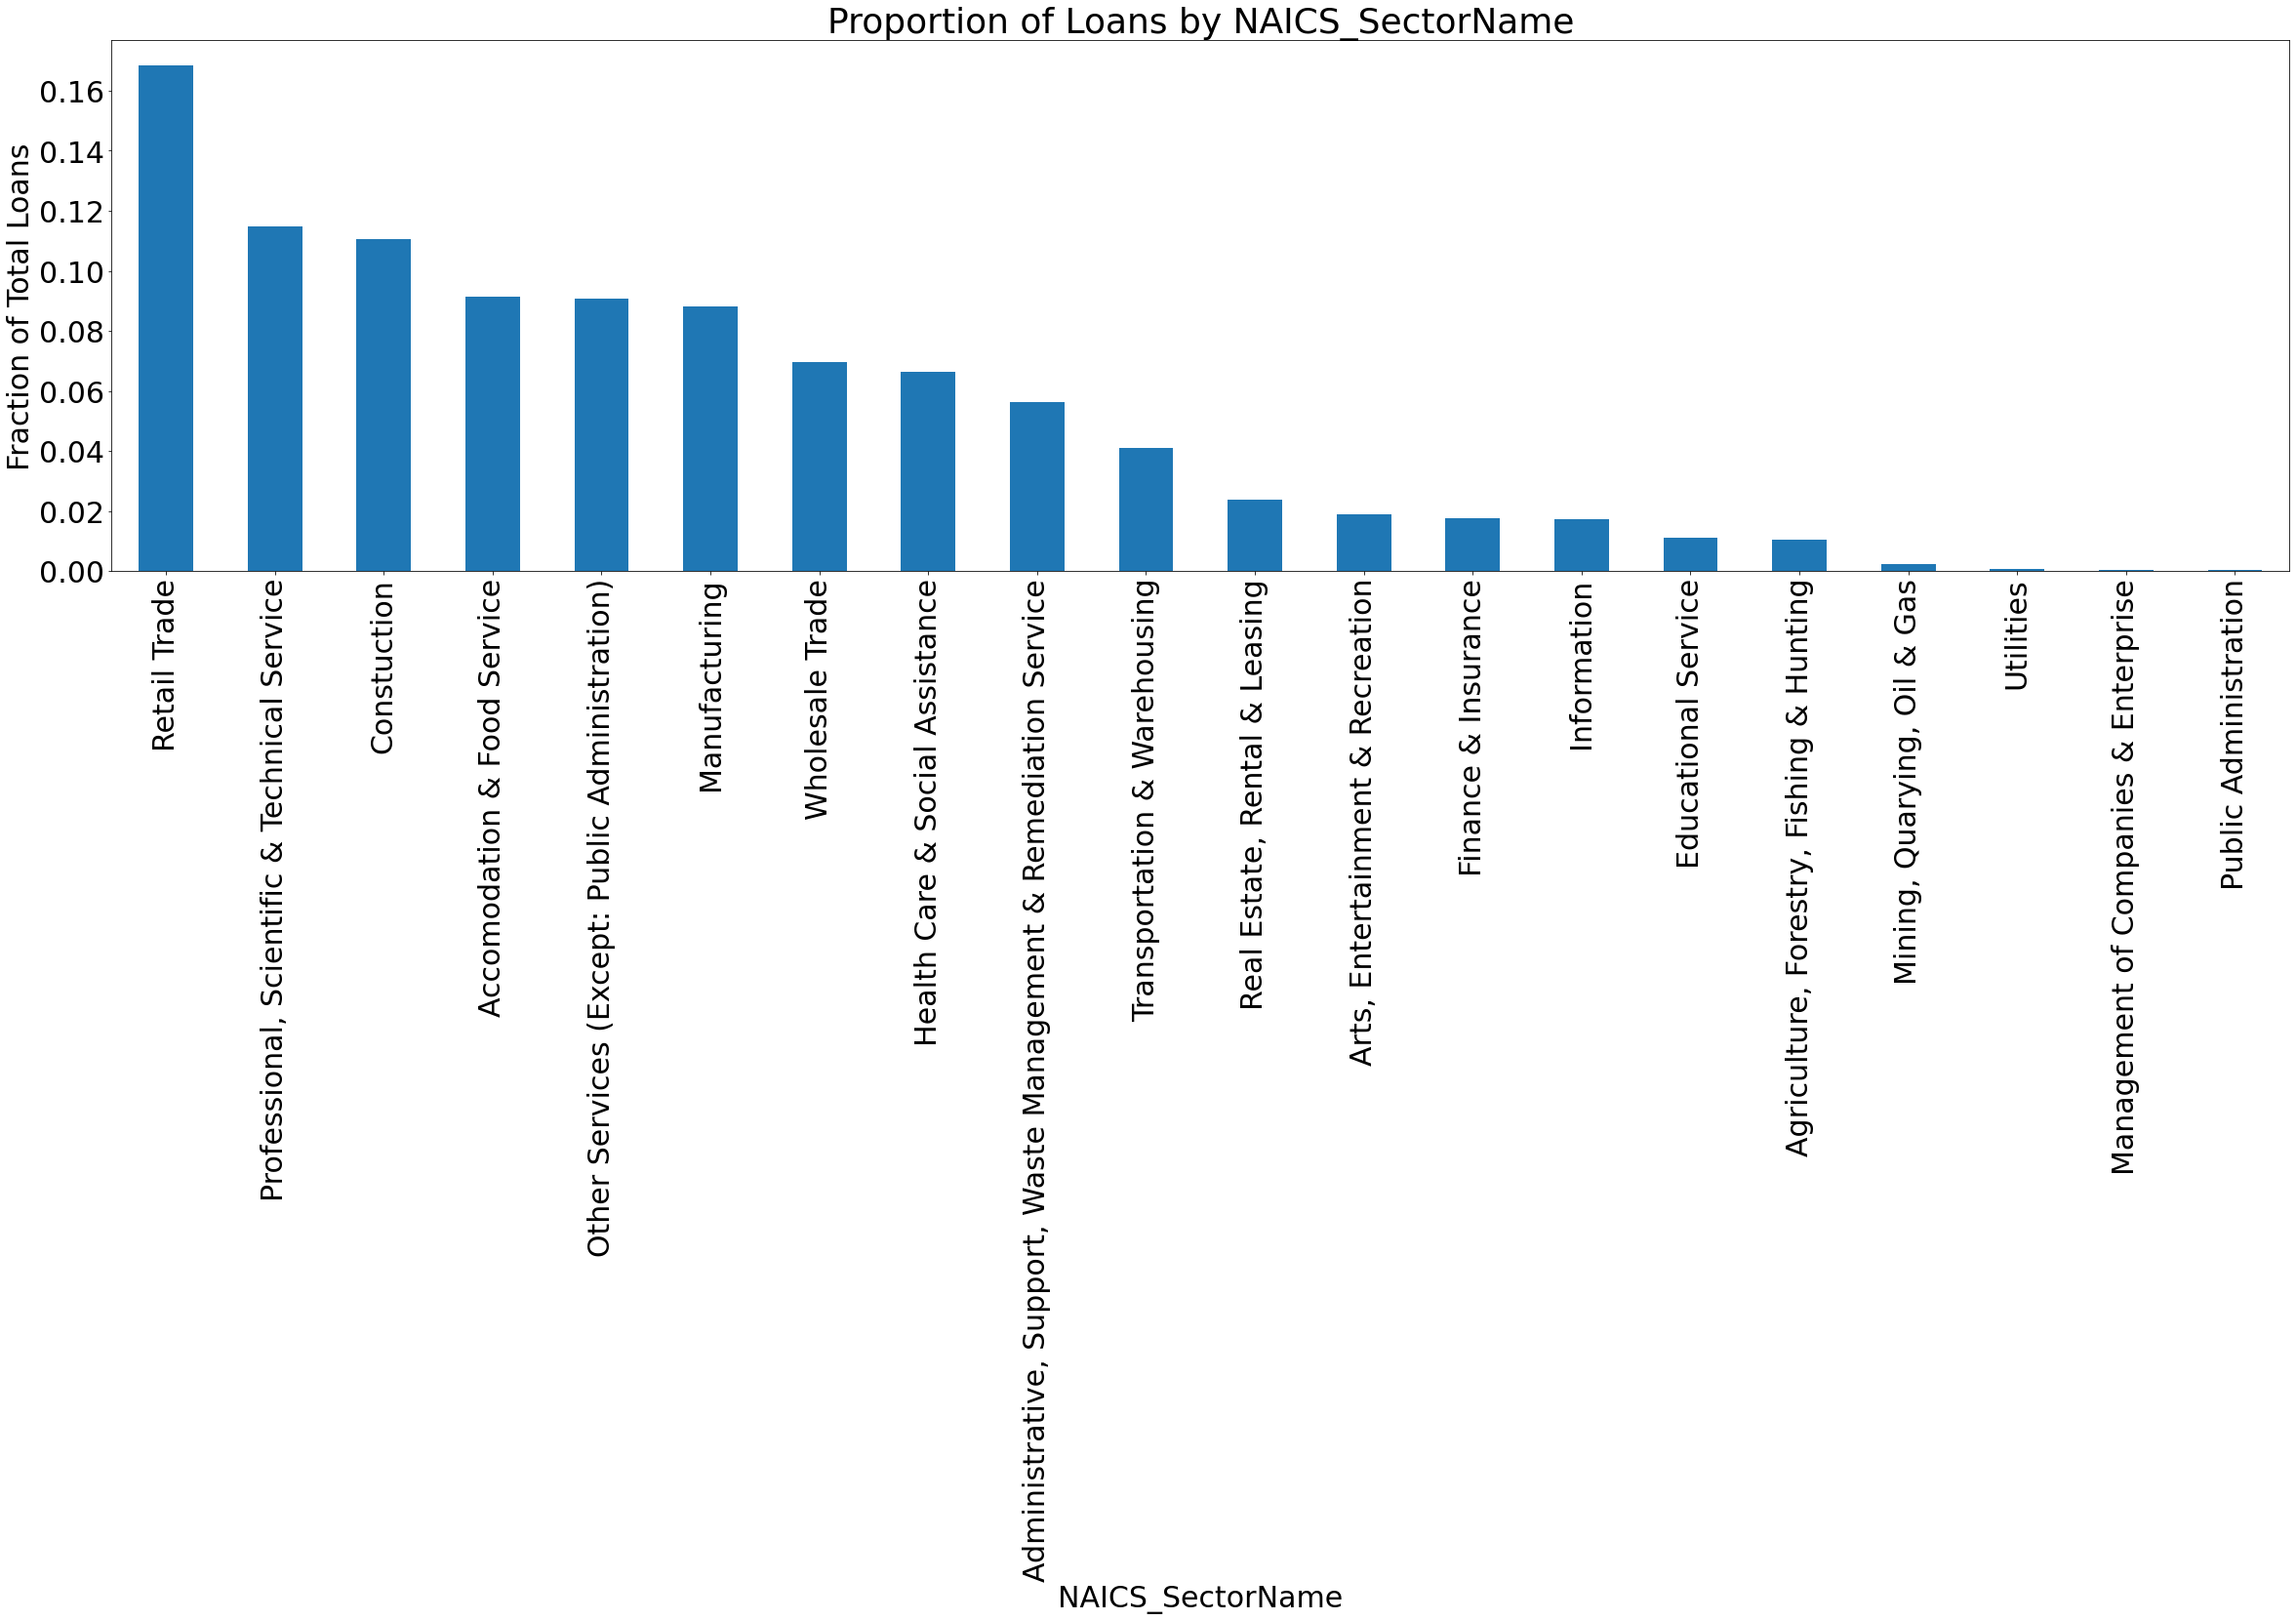

In [41]:
create_plots(SBA_loan_data, column='NAICS_SectorName')

Finding the distribution of loans approved by year.

**Insights:** Loan activity for small businesses peaked in the mid to late 2000s. The sharp drop in loans after the late 2000s may be due to the great recession, which negatively impacted business and hence loan activity.

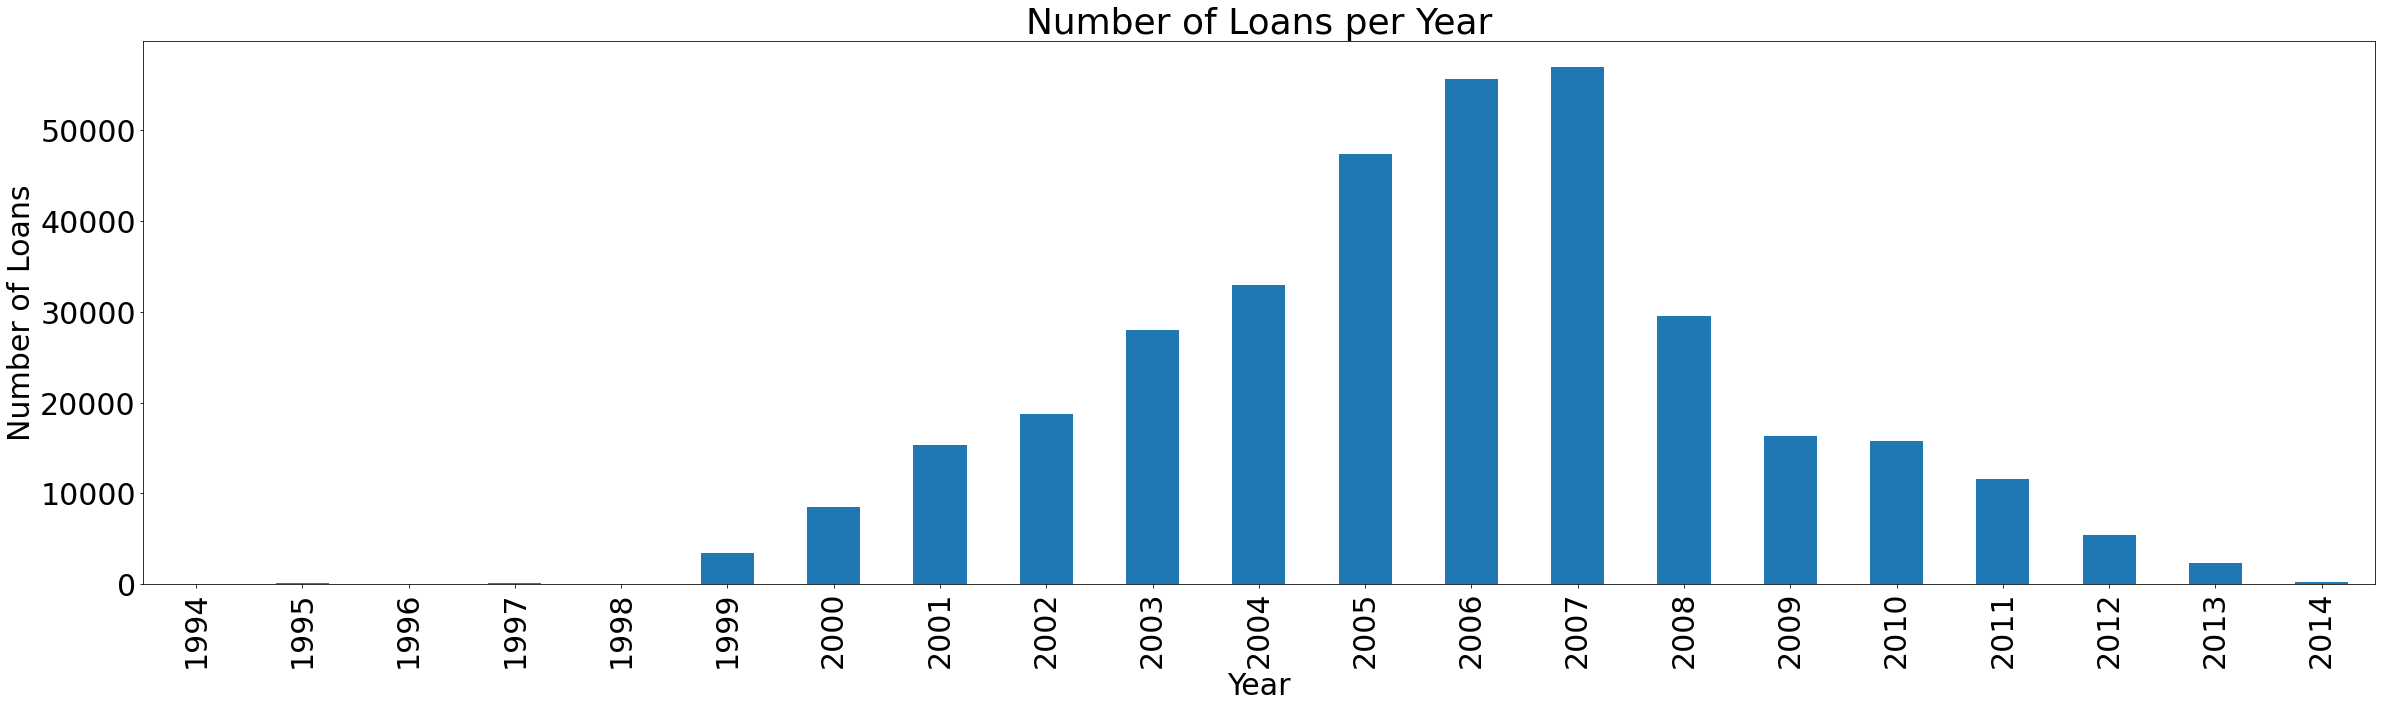

In [42]:
SBA_loan_data['ApprovalFY'].value_counts().reindex(range(1994, 2015))\
.plot(kind='bar');
plt.title('Number of Loans per Year');
plt.xlabel('Year');
plt.ylabel('Number of Loans');

Getting the proportion of loan activity per month

**Insights:** We see that March and September see small peaks in loan activity, which could suggest that loan activity is seasonal and peaks every 6 months

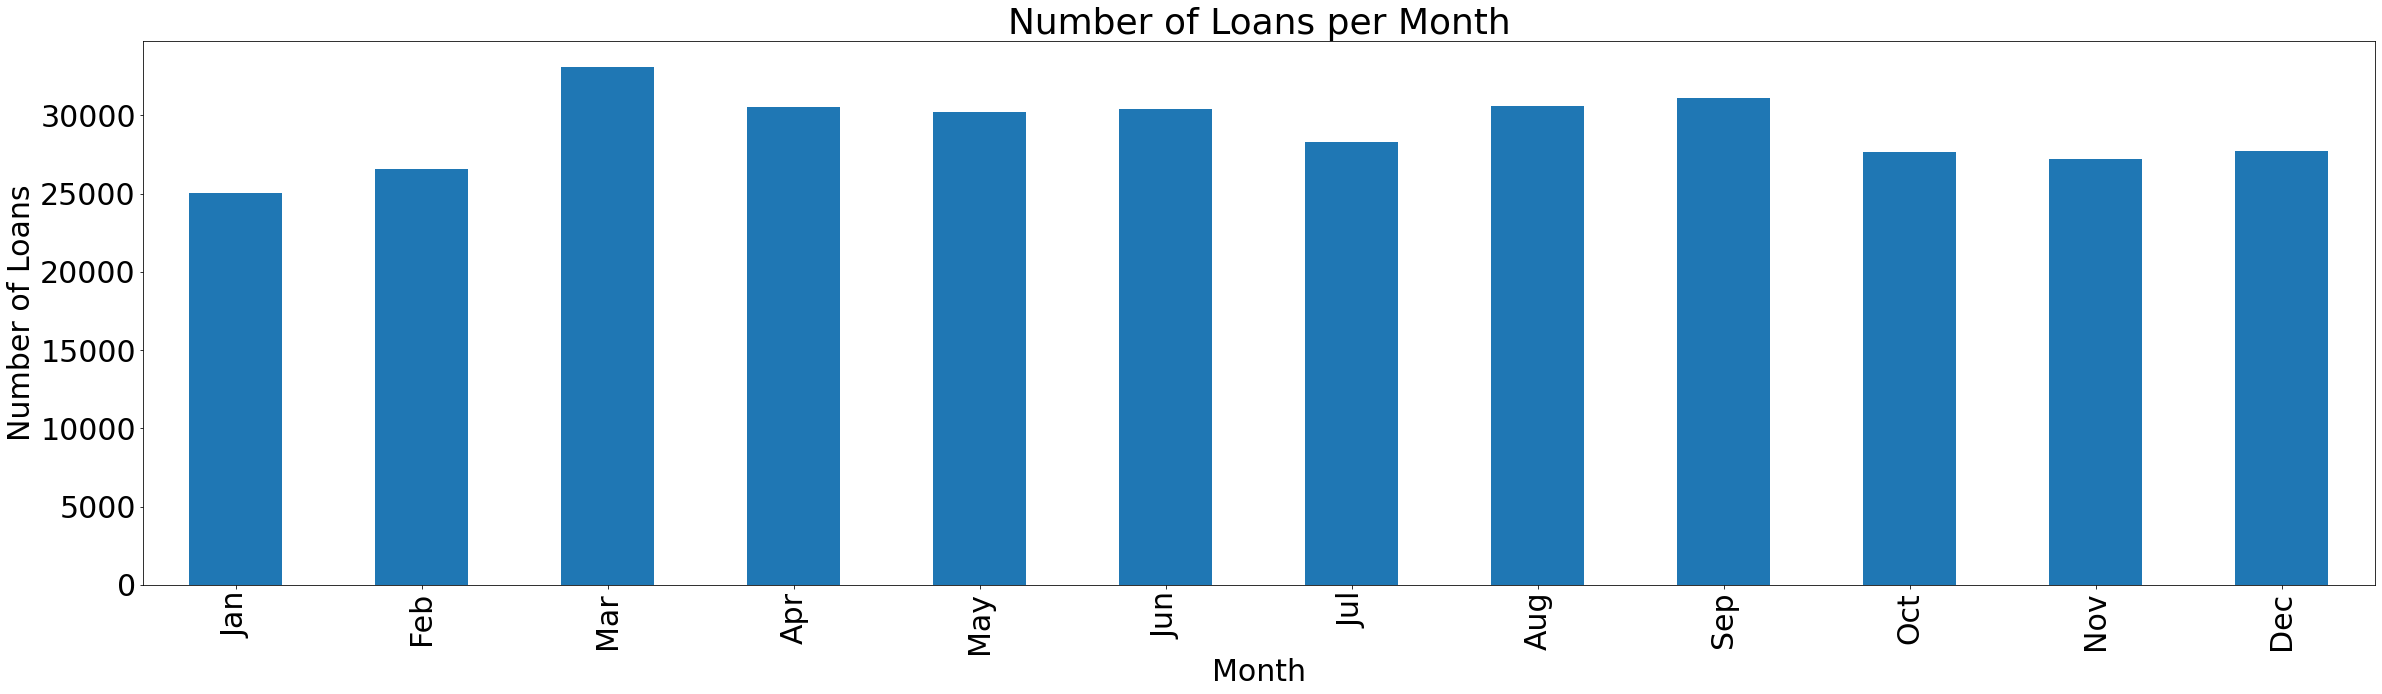

In [43]:
SBA_loan_data['Month'].value_counts().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])\
.plot(kind='bar');
plt.title('Number of Loans per Month');
plt.xlabel('Month');
plt.ylabel('Number of Loans');

Analyzing summary statistics for the numerical values.

**Insights:**

1. All of the features have moderate to severe outliers, given the disparities between the mean and medians, as well as the large differences between the median (50%) and the max, sometimes being orders of magnitude apart. This will affect the models used later on, such as logistic regression. A more robust feature scaling method that accounts for the outliers will need to be used. <br><br>
2. The majority of jobs created fall between 0 and 2. This suggests that the majority of businesses do not create many jobs. The max value raises eyebrows. 5085 jobs created do not fall in line with the typical jobs created for small businesses. <br><br>
3. The number of employees fall between 2 to 8. This falls in line with the typical employee size of small businesses. The max value raises skepticism. 8000 employees are way too large to be in the definition of small businesses. <br><br>
4. Number of jobs retained typically fall between 1 to 6. Again, the max value is interesting and may need to be disregarded, as over 4000 jobs retained are way too large to be small business numbers.<br><br>
5. The majority of loan terms are between 50 to 84 months, or roughly 4 to 7 years. The maximum duration is 527 months, or 44 years! That is a long time. <br><br>
6. Gross amount approved by bank (GrAppv), amount approved by SBA (SBA_Appv), and loan amount (DisbursementGross) follow similar patterns. All of them have severe outliers and max values being well in the millions. Typically, the amount approved by the bank is 1.5-2x higher than the amount SBA guarantees. <br><br>

In [44]:
SBA_loan_data[['CreateJob', 'NoEmp', 'RetainedJob', 'Term', 'GrAppv', 'SBA_Appv', 'DisbursementGross']]\
.describe().apply(lambda x: round(x, 2), axis=1)

,CreateJob,NoEmp,RetainedJob,Term,GrAppv,SBA_Appv,DisbursementGross
count,348537.00,348537.00,348537.00,348537.00,348537.00,348537.00,348537.00
mean,2.01,8.22,5.71,81.77,136748.70,99872.59,160490.23
std,14.46,31.81,16.16,57.81,269248.19,221287.84,286511.79
min,0.00,0.00,0.00,0.00,1000.00,500.00,4000.00
25%,0.00,2.00,1.00,50.00,25000.00,12500.00,27500.00
50%,0.00,3.00,2.00,84.00,50000.00,25000.00,62000.00
75%,2.00,8.00,6.00,84.00,107820.00,75000.00,155900.00
max,5085.00,8000.00,4441.00,527.00,5000000.00,4500000.00,11446325.00


Analyzing the summary statistic for charged off amounts only for loans that have defaulted.

**Insights:** For all loans that have defaulted, the average amount written charged off is \\$56127.23. Again, default amounts have high variability, with the greatest being charged off at $2 million, a huge amount of money lost by all parties.

In [45]:
SBA_loan_data['ChgOffPrinGr'][SBA_loan_data['ChgOffPrinGr'] > 0].describe().apply(lambda x: round(x, 2))

count      96213.00
mean       56127.63
std       109843.82
min           11.00
25%        14671.00
50%        26611.00
75%        49949.00
max      1999999.00
Name: ChgOffPrinGr, dtype: float64

<a id='2.3.2'></a>
### 2.3.2 Correlation Analysis

This section will explore the correlations between the various features to identify relationships and patterns between the different features that may uncover loan business trends.

**Insights:** 

1. The disbursement amount, amount the bank approves, and the amount that SBA approves are highly correlated with each other. This falls in line with the claim that these three features follow similar patterns, as shown in the summary statistics. The high correlation between the amount SBA guarantees and amount the bank approves suggests that the amount the bank approves may be dependent on the amount that SBA decides to guarantee, vice versa. This also indicates that the risk the bank is willing to take on may depend on the amount that SBA agrees to guarantee. On the other hand, the high correlation will also introduce multicollinearity issues. Thus, not all of the three features should be used to avoid issues with model interpretation down the line. The high correlation between these variables also suggest that feature engineering can be used which combines these features together to create a new one. <br><br>
2. The term length is not as correlated with the loan amount as I had originally assumed. This suggests that long term loans may not necessary have a high loan dollar value, vice versa. This could indicate that SBA is highly effective at extending loan terms for their borrowers, as there may be situations where small loans are given a high term length. This is highly beneficial to the borrower as they have more time to pay off their loans, which will likely increase the ability to pay it off without defaulting.

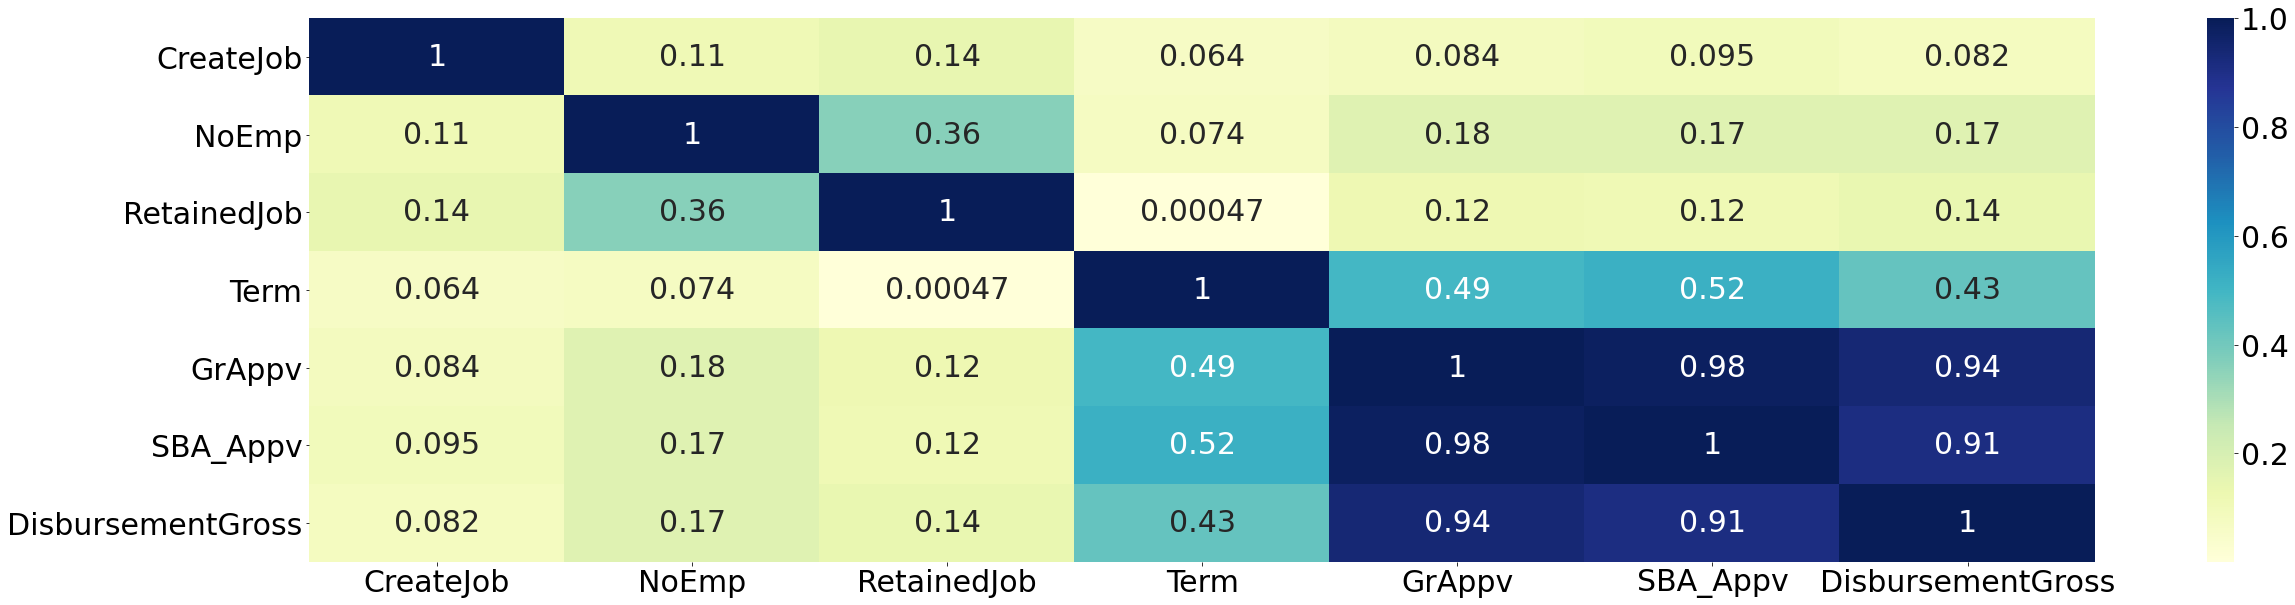

In [46]:
sns.heatmap(SBA_loan_data[['CreateJob', 'NoEmp', 'RetainedJob', 'Term', 'GrAppv', 'SBA_Appv', 'DisbursementGross']].corr(), 
            annot=True, 
            cmap="YlGnBu");

<a id='2.3.3'></a>
### 2.3.3 Loan Default Rate Analysis

This section entails the comparison of the loan default rate across various features to understand general default trends. This section will inform of which features to use in the Machine Learning models in the following section.

We first create a function that build the default rate plot.

In [47]:
def plot_default_rate(df, column, sort_values_greatest_to_least=True):
    # Creating a table that combines the number of loans in total to the number of defaults grouped by the feature we're
    # interested in exploring
    table_of_default_rates = df.groupby(column)[[column]]\
    .agg('count').rename(columns={column: f'Number of Loans by {column}'}).join(
    df[df['MIS_Status'] == 1].groupby(column)[[column]]\
    .agg('count').rename(columns={column: f'Number of Defaults by {column}'}), how = 'left'
    )
    # If we want to sort the plot from greatest to least
    if sort_values_greatest_to_least:
        (table_of_default_rates[f'Number of Defaults by {column}'] / table_of_default_rates[f'Number of Loans by {column}']).\
        sort_values(ascending=False).plot(kind='bar');
        plt.title(f'Default Rate by {column}');
        plt.ylabel('Default Rate');
    # If we don't want to sort the plot from greatest to least
    else:
        (table_of_default_rates[f'Number of Defaults by {column}'] / table_of_default_rates[f'Number of Loans by {column}']).\
        plot(kind='bar');
        plt.title(f'Default Rate by {column}');
        plt.ylabel('Default Rate');

### State

Plotting the state default rate.

**Insights:** Nevada and Georgia have the highest default rates, at nearly 40%. North Dakota has one of the lowest default risks, at roughly 10%. This visual demonstrates that the state a business is in does influence the default risk.

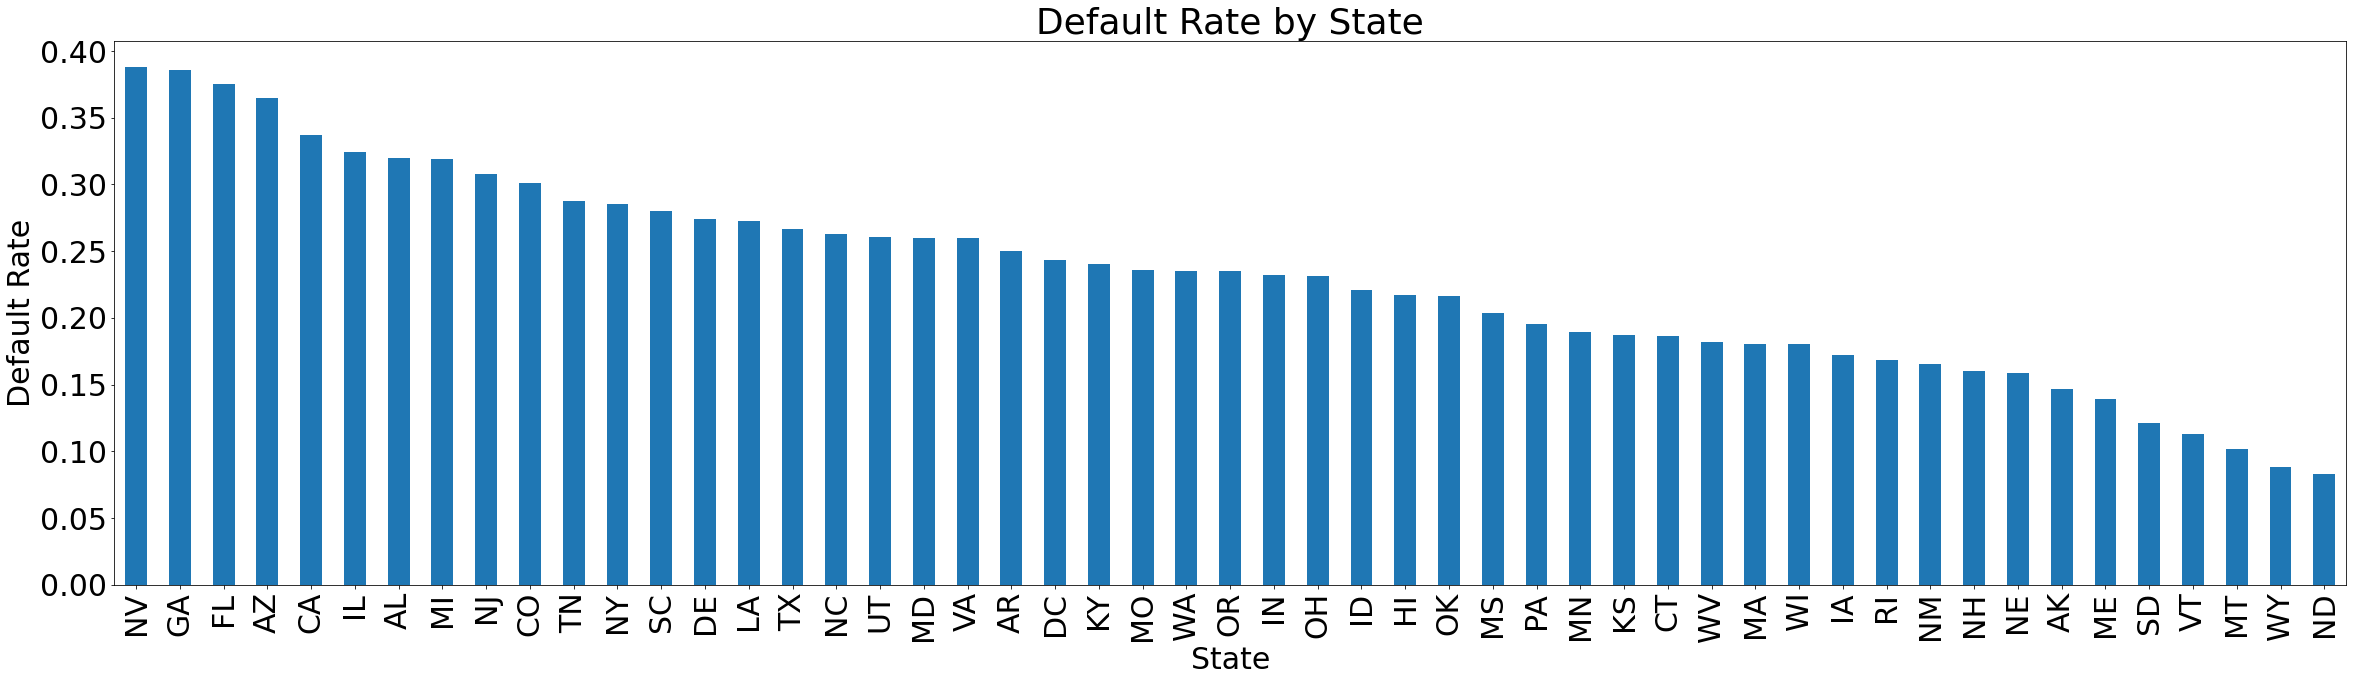

In [48]:
plot_default_rate(SBA_loan_data, 'State')

### New vs Existing Business

Plotting the default rate for new vs. existing businesses.

**Insights:** Default rate does not appear to be significantly influenced by whether the business is new or not, with a slightly lower default rate for new businesses

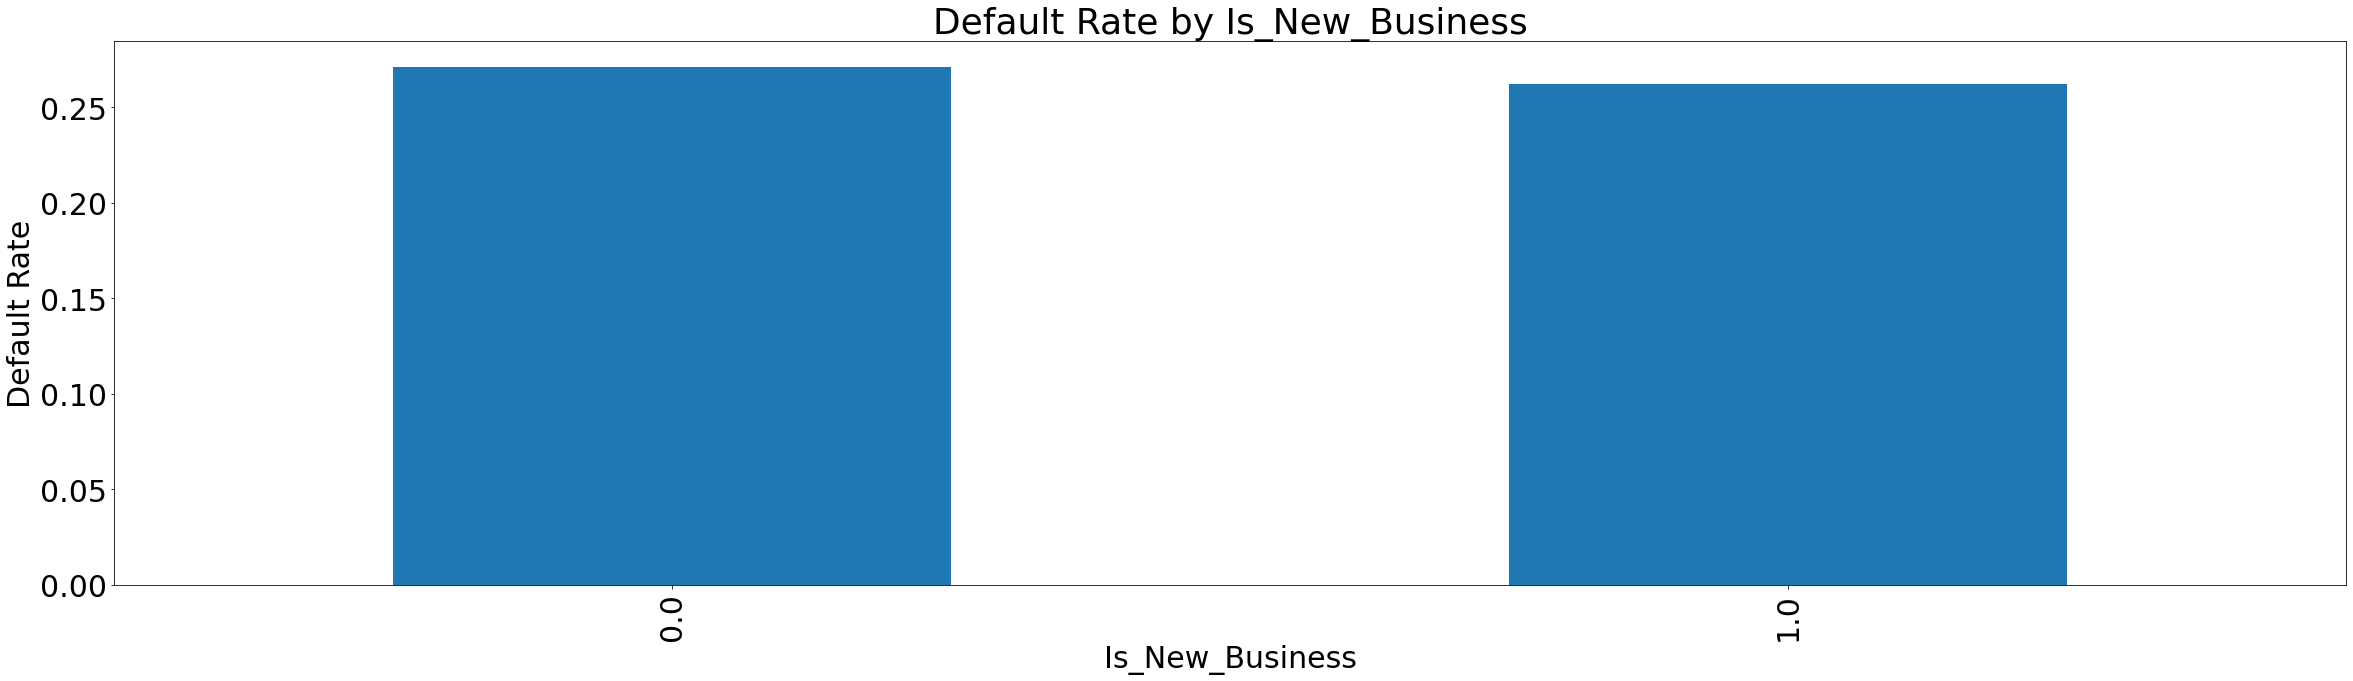

In [49]:
plot_default_rate(SBA_loan_data, 'Is_New_Business')

### Urban vs Rural

Plotting the default rate for urban vs. rural businesses.

**Insights:** Default rate is higher for urban compared to rural businesses.

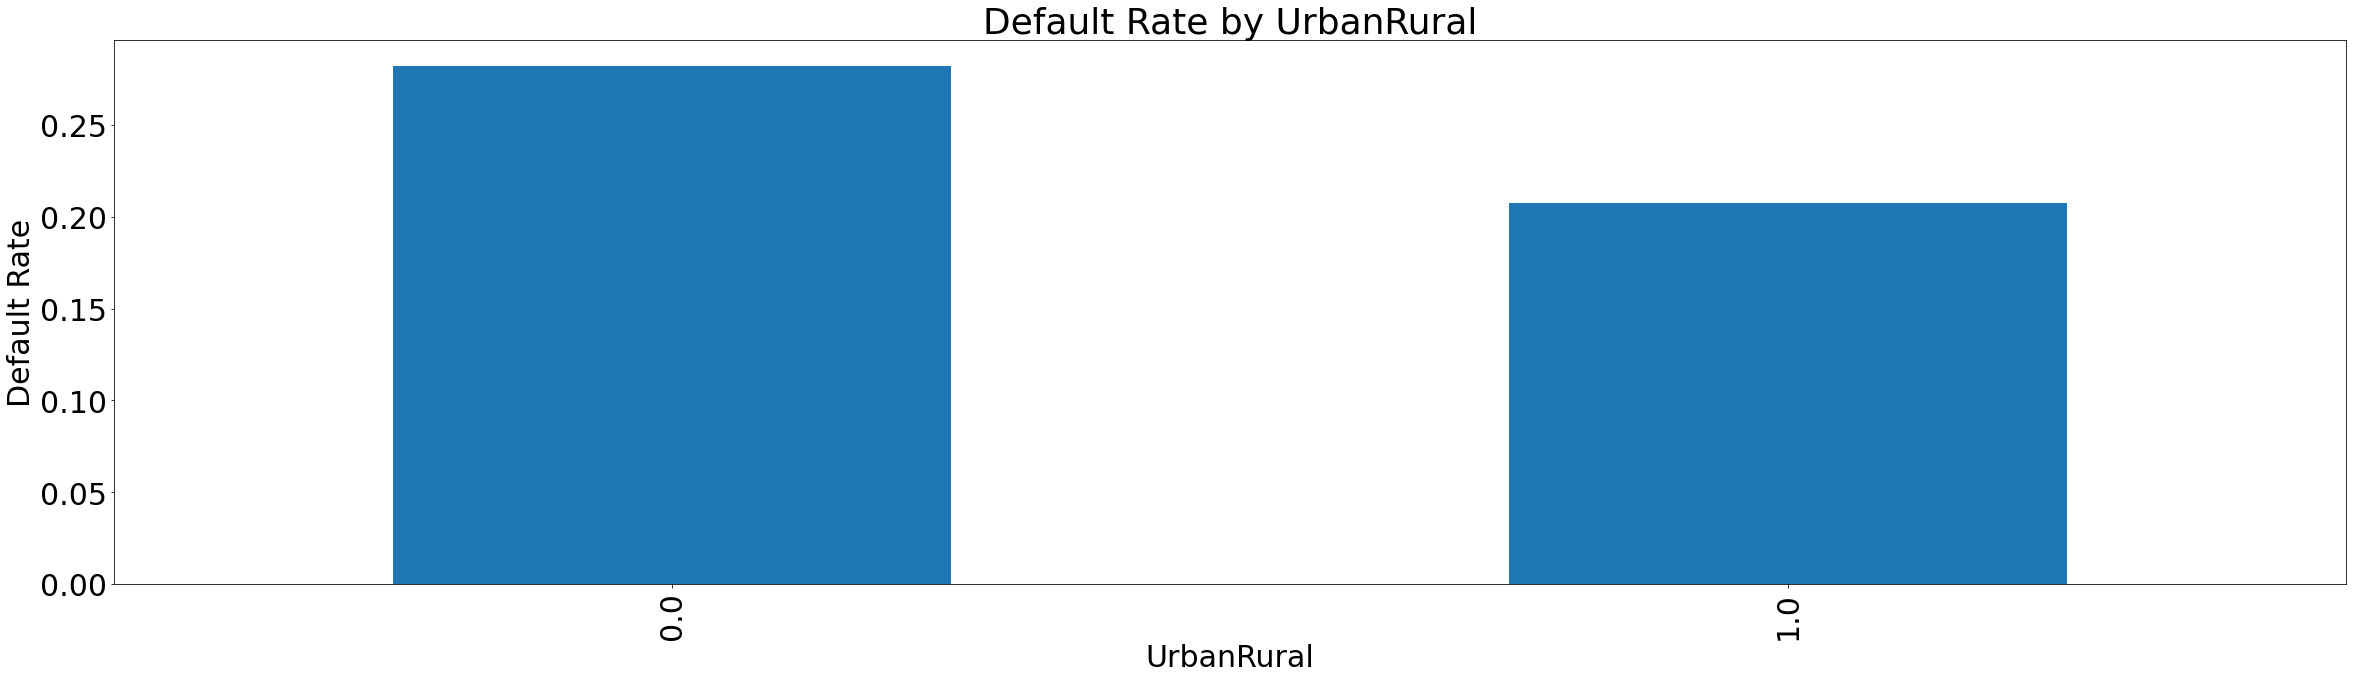

In [50]:
plot_default_rate(SBA_loan_data, 'UrbanRural')

### Revolving Line of Credit

Plotting the default rate for revolving line of credit.

**Insights:** Default rate does not appear to be influenced much by whether the loan is revolving line of credit, although having a revolving line of credit does appear to reduce the default risk slightly.

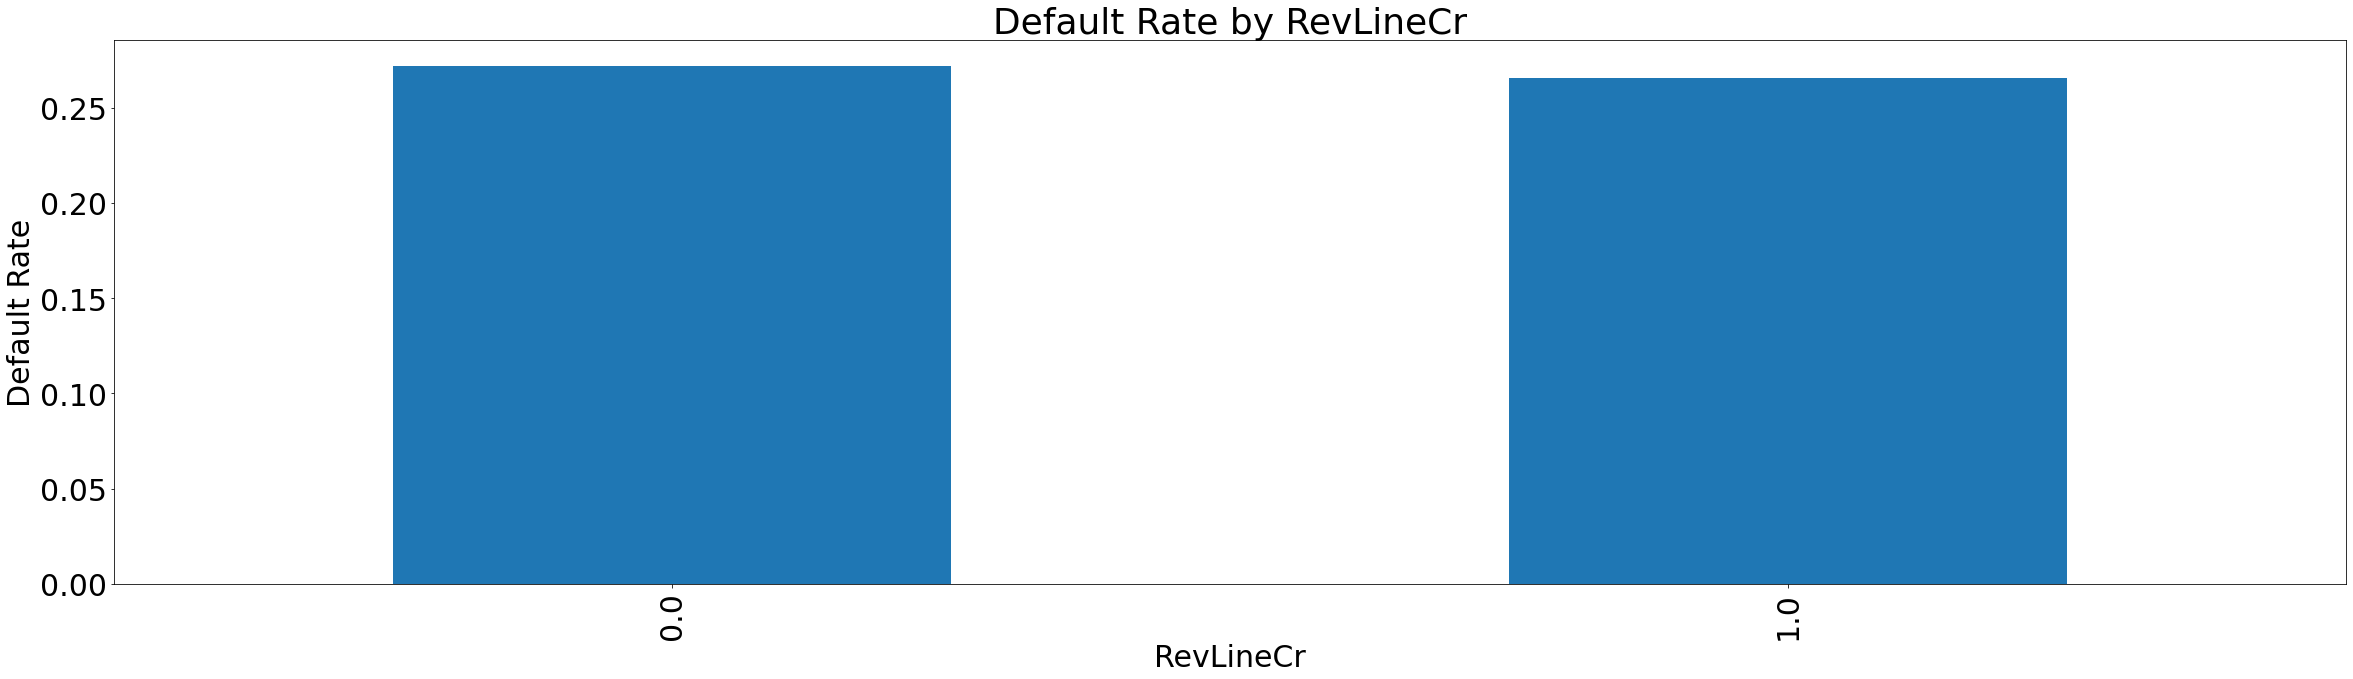

In [51]:
plot_default_rate(SBA_loan_data, 'RevLineCr')

### LowDoc Loan Program

Plotting the default rate for whether loan is part of the LowDoc loan program.

**Insights:** It appears that loans that are part of the LowDoc loan program are far less likely to default. The reason for this could be that SBA's lowdoc program's purpose is to assist small businesses in paying off their loans, which in turn would reduce the default risk.

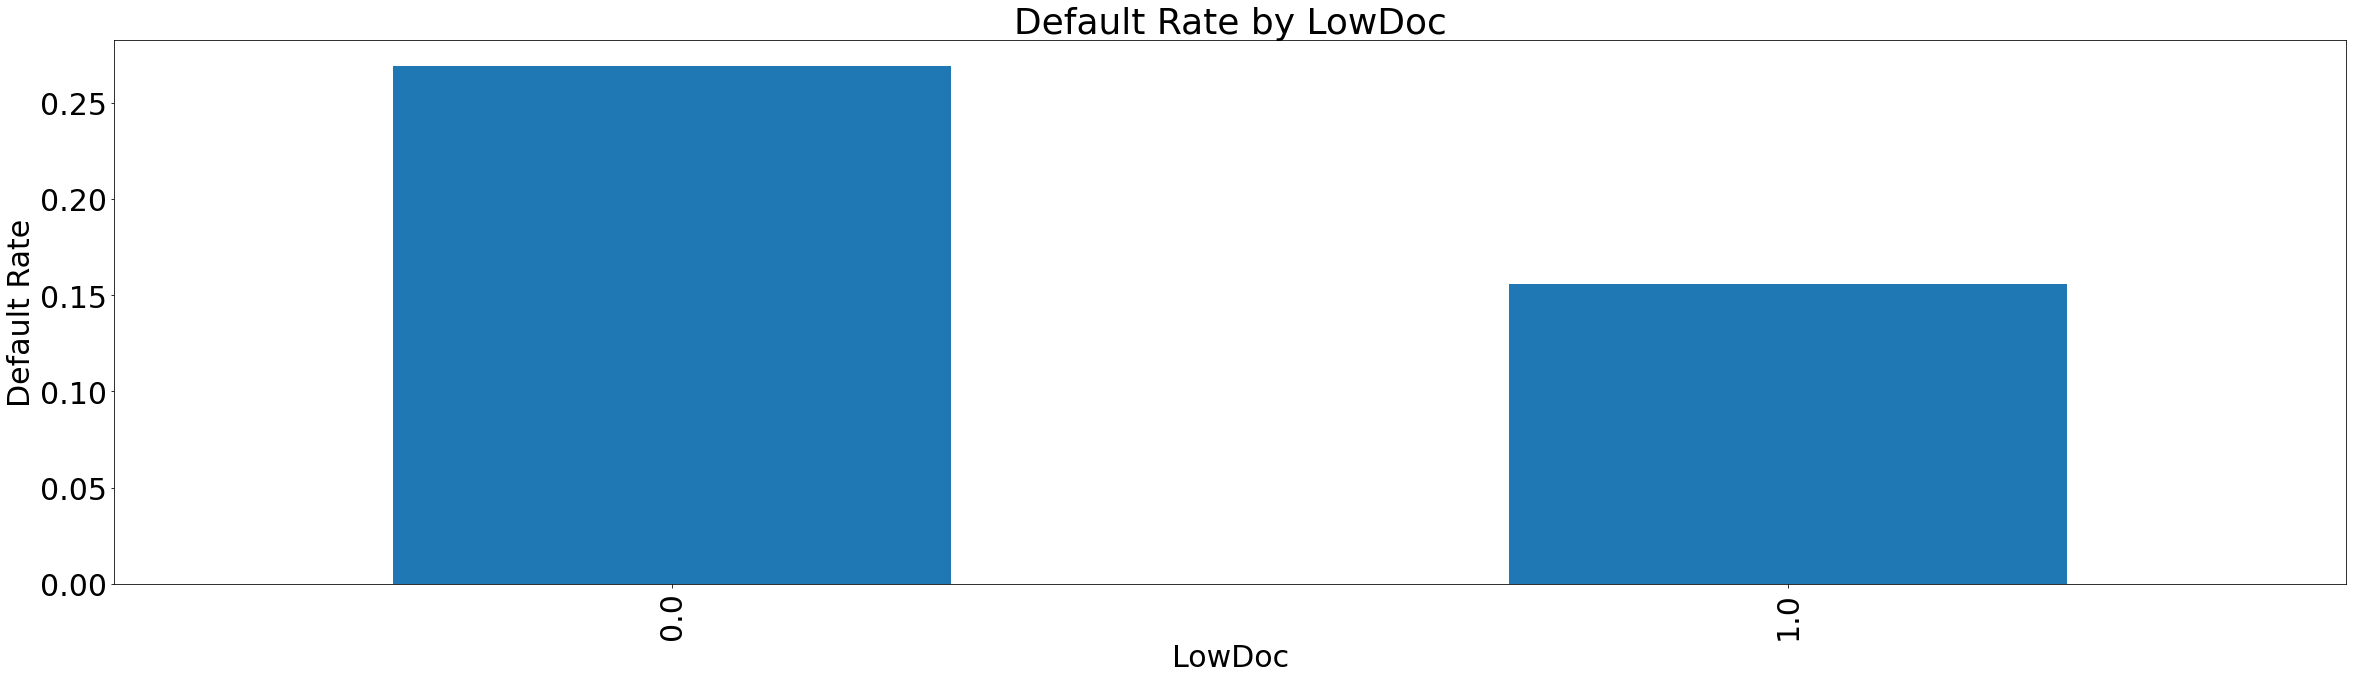

In [52]:
plot_default_rate(SBA_loan_data, 'LowDoc')

### Franchised or Not

Plotting the default rate for whether loan is part of a franchised business.

**Insights:** Franchised businesses (denoted by 1) are much less likely to default on the loan. This could be because franchised businesses receive assistance from the franchisor, which would lower failure rate/increase profits, in turn, reducing the risk of loan default.

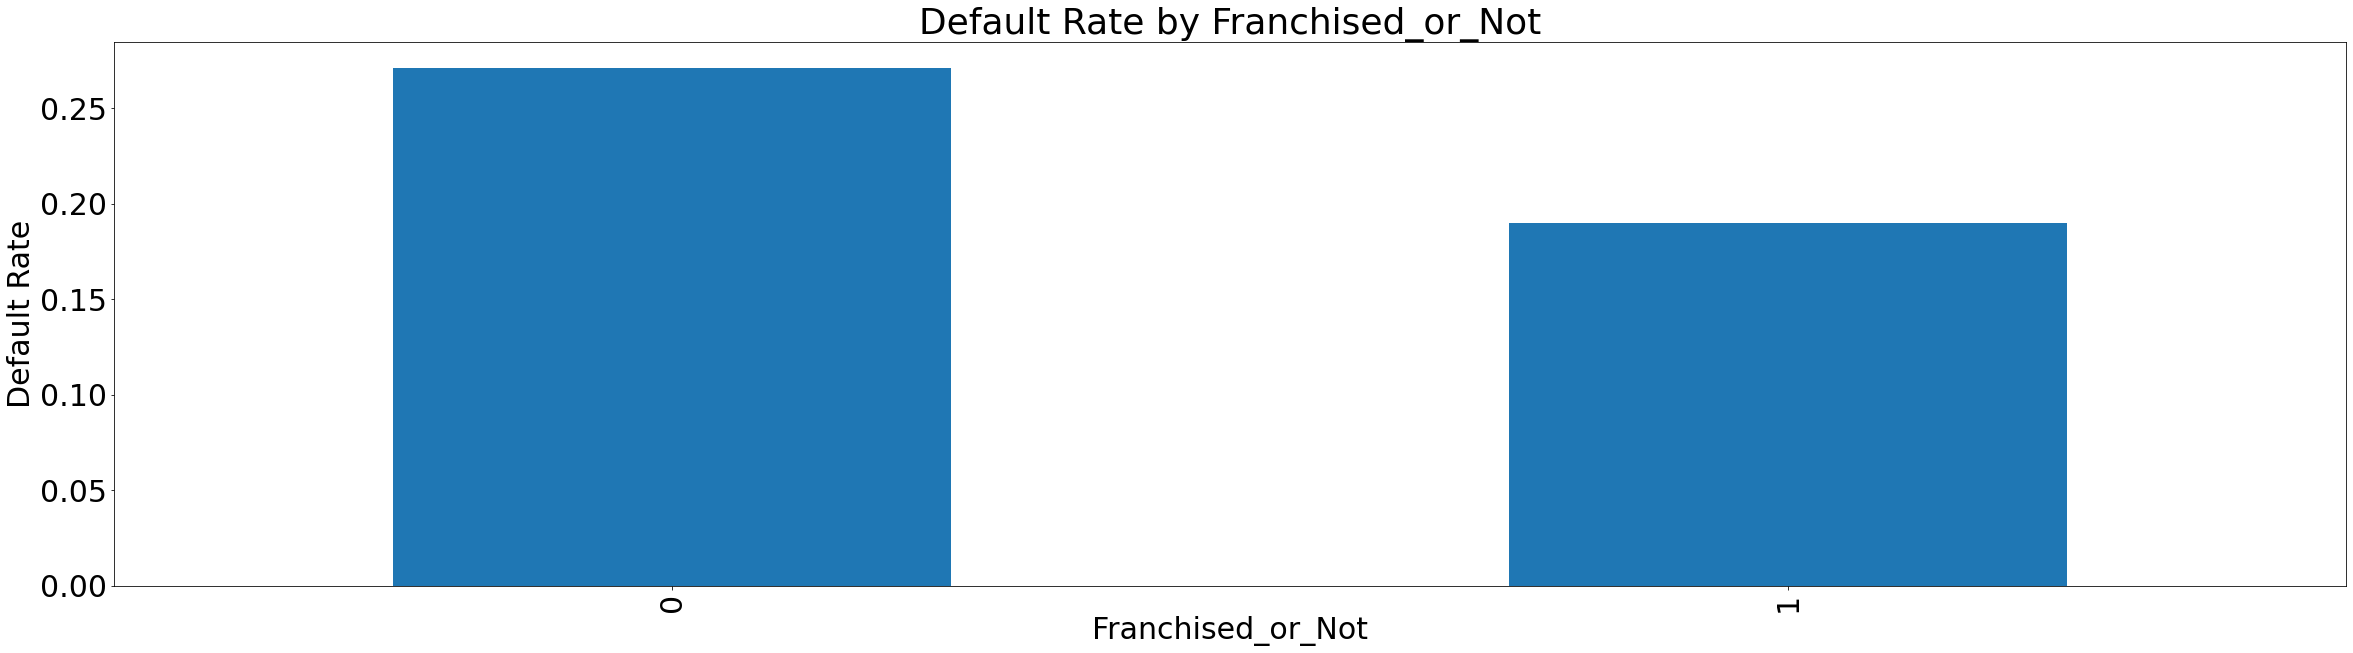

In [53]:
plot_default_rate(SBA_loan_data, 'Franchised_or_Not')

Plotting the default rate for whether loan was approved during a recession.

**Insights:** Businesses that are part of a recession have higher default rates, though not by too much. This makes sense as it is typically harder to do business in a recession, hence making it harder to pay off loans. 

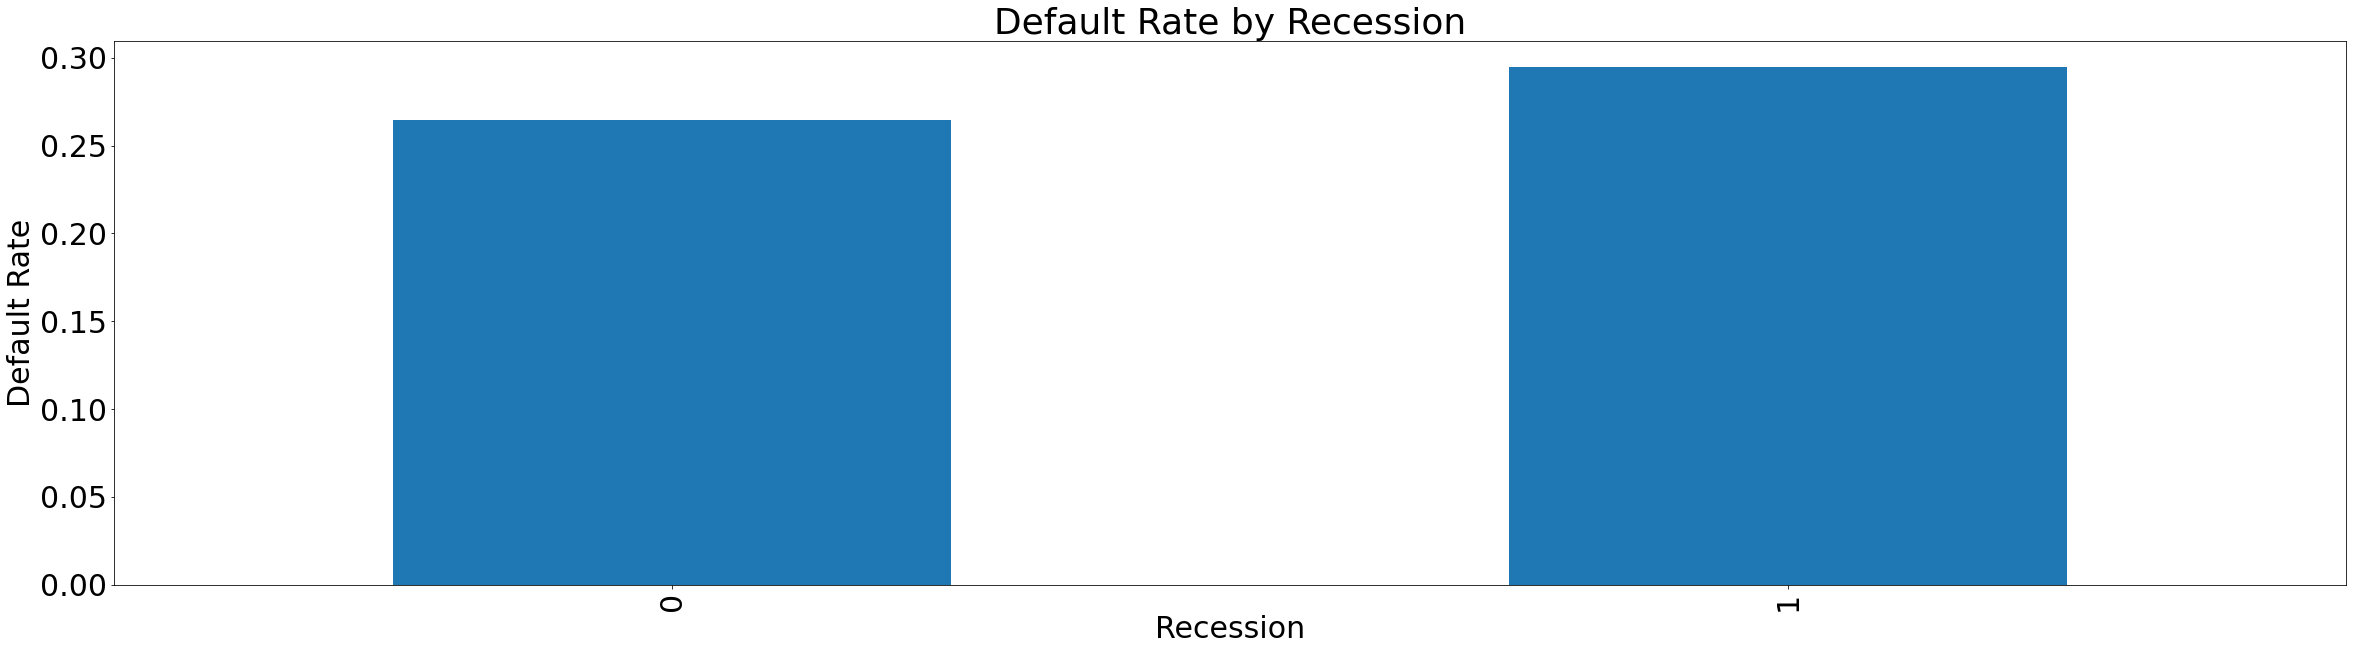

In [54]:
plot_default_rate(SBA_loan_data, 'Recession', sort_values_greatest_to_least=False)

### NAICS Sector

Plotting the default rate for whether the borrower is in the same location as their bank.

**Insights:** It appears that businesses in the real estate and rental industry are most likely to default followed by finance and insurance. The industry least likely to default is mining, quarying, and oil and gas. This sector's low default risk needs to be analyzed skeptically considering that the dataset's latest loan was in June 25, 2014, before the full effects of the 2014 oil crash were observed, of which started in June 20, 2014. Nonetheless, this graph does demonstrate that the industry sector does influence default risk, as different industries have unique challenges and advantages to operating their businesses.

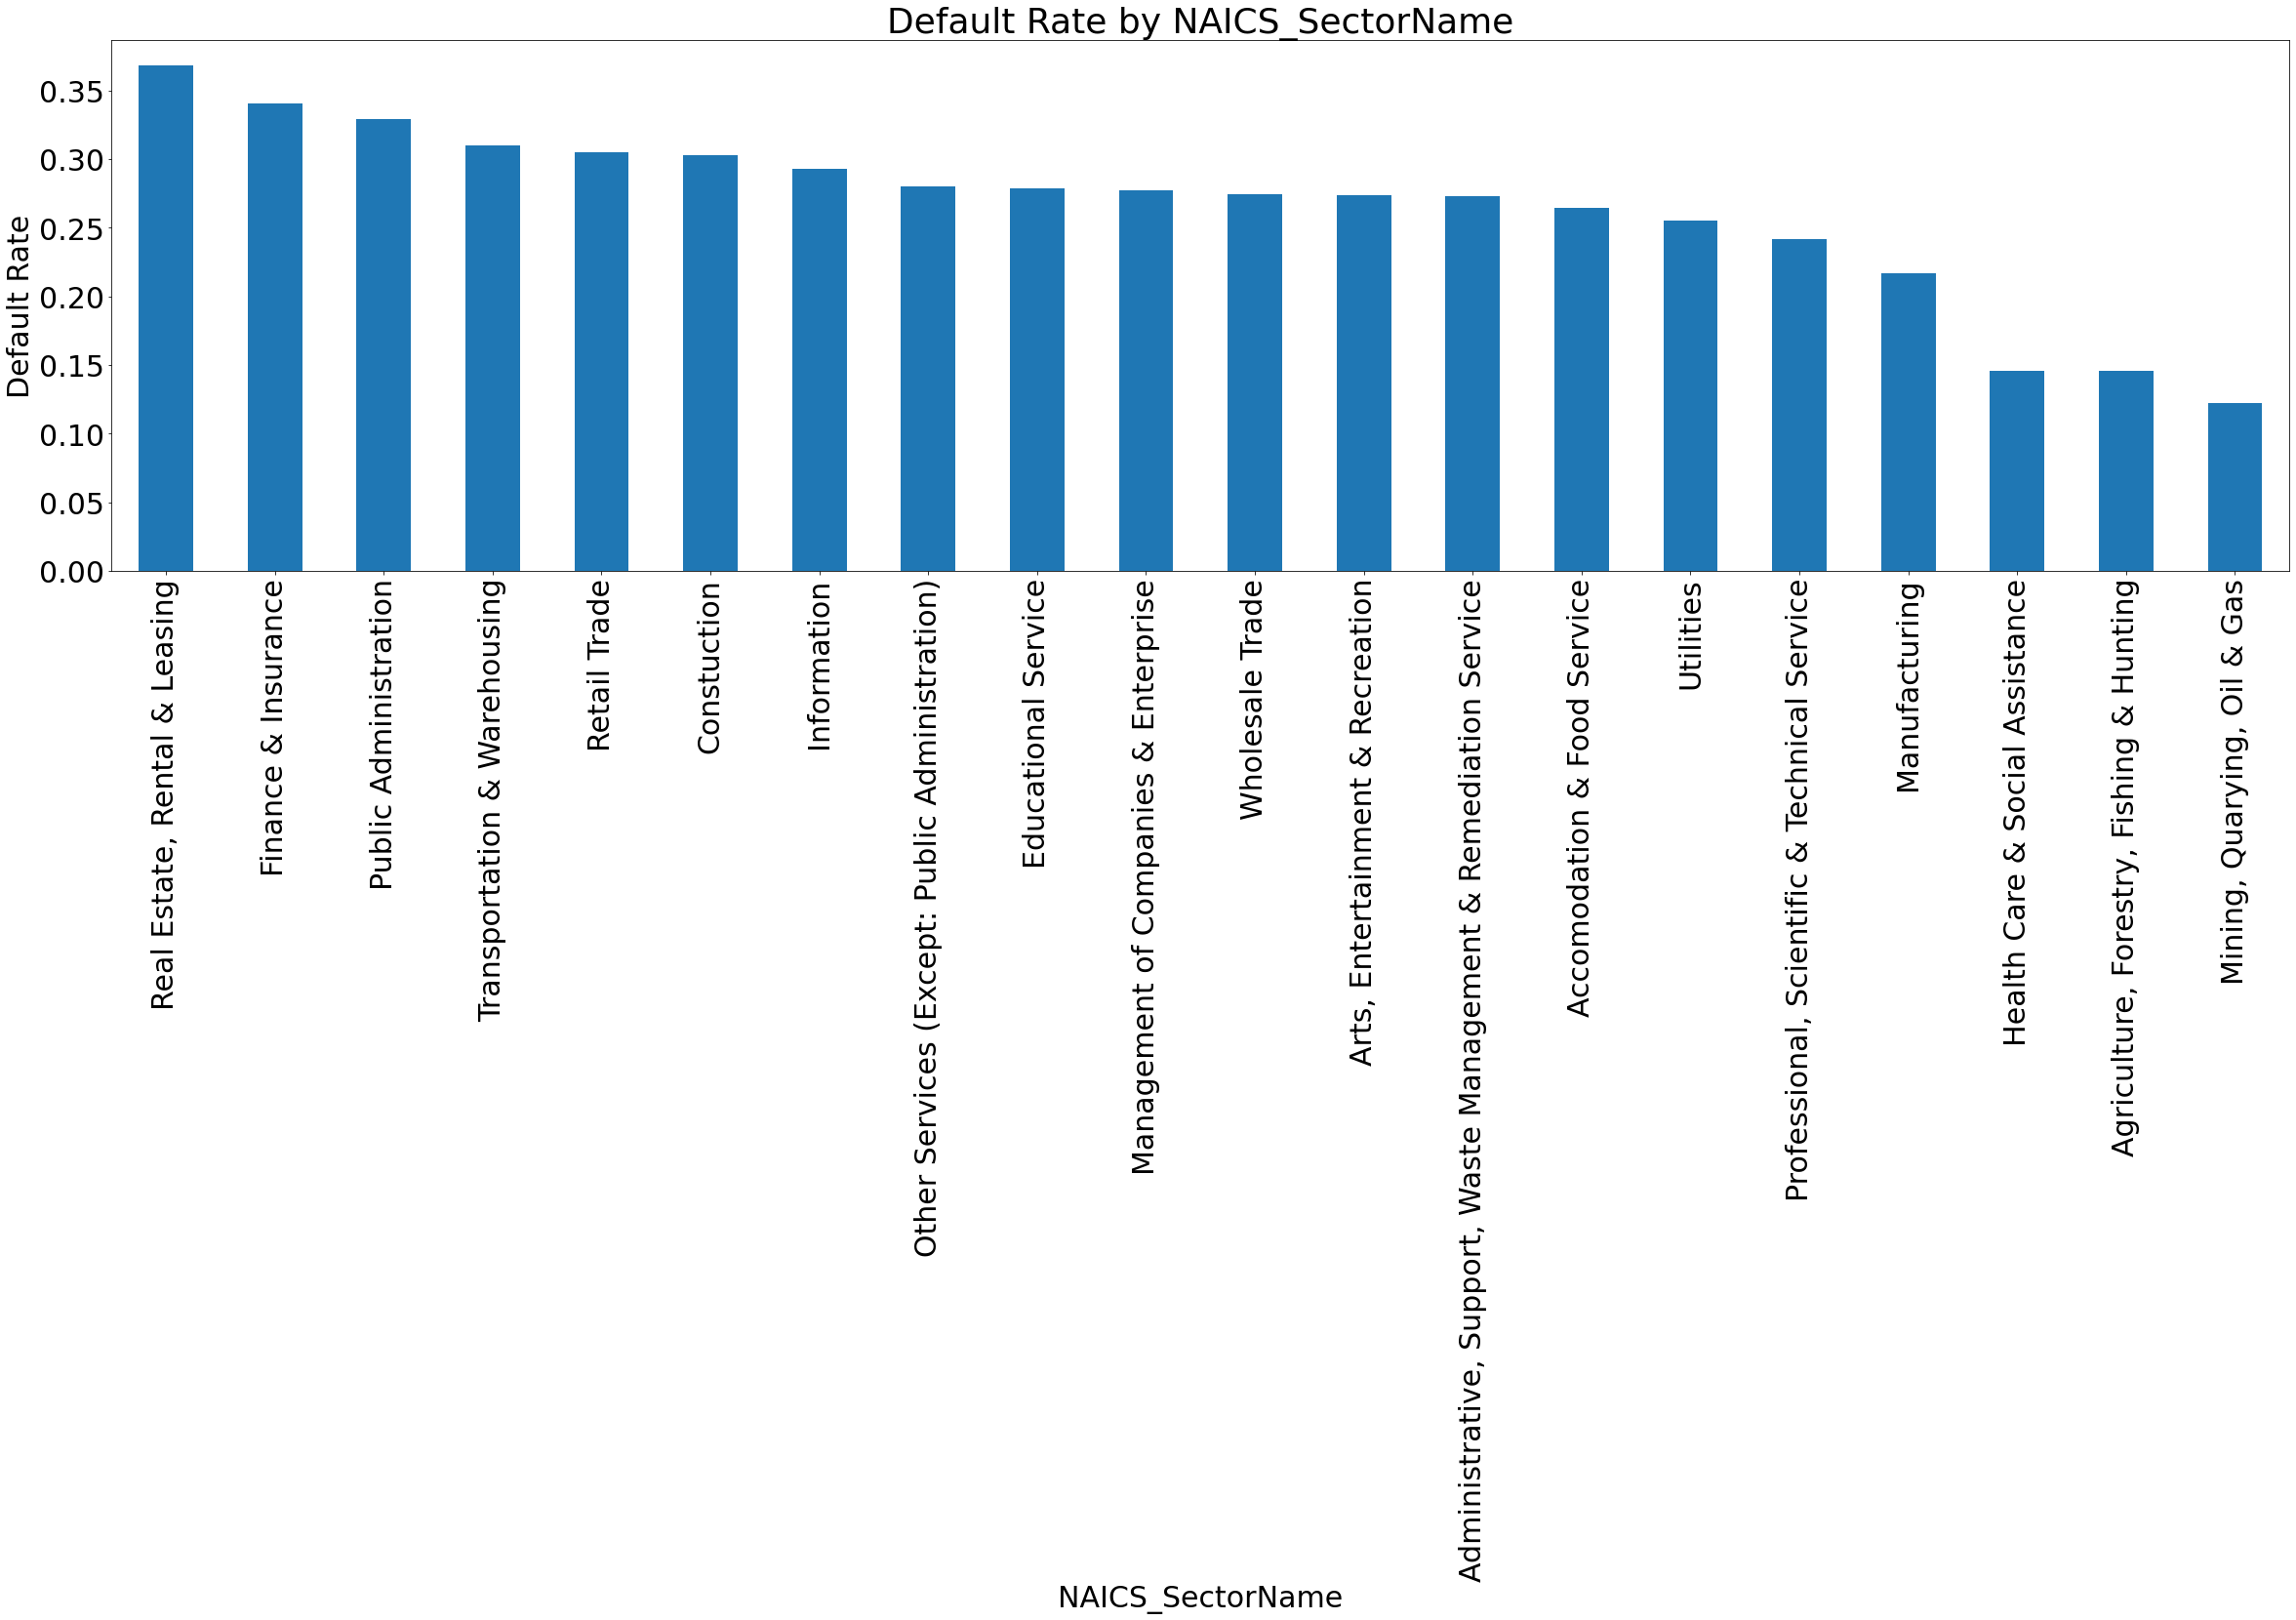

In [55]:
plot_default_rate(SBA_loan_data, 'NAICS_SectorName')

Finding the latest loan approval date in the dataset to determine whether this dataset was collected before the oil crash began on June 20, 2014. 

**Insights:** Given the most recent loan was approved only 5 days after the oil crash, it is highly unlikely the effects of the oil crash affected this dataset's default rates in the oil industry.

Source: https://www.bls.gov/opub/btn/volume-4/pdf/the-2014-plunge-in-import-petroleum-prices-what-happened.pdf

In [56]:
str(SBA_loan_data['ApprovalDate'].max())

'2014-06-25 00:00:00'

### Year

Plotting a time series of default rate.

**Insights:** It appears that there was a peak in default rate in 2007 and 2008, likely due to the subprime mortgage crisis and the following great recession. Surprisingly, the two other local peaks are in 1996 and 1998, which are not defined as recession time periods according to Investopedia.

Source: https://www.investopedia.com/articles/economics/08/past-recessions.asp

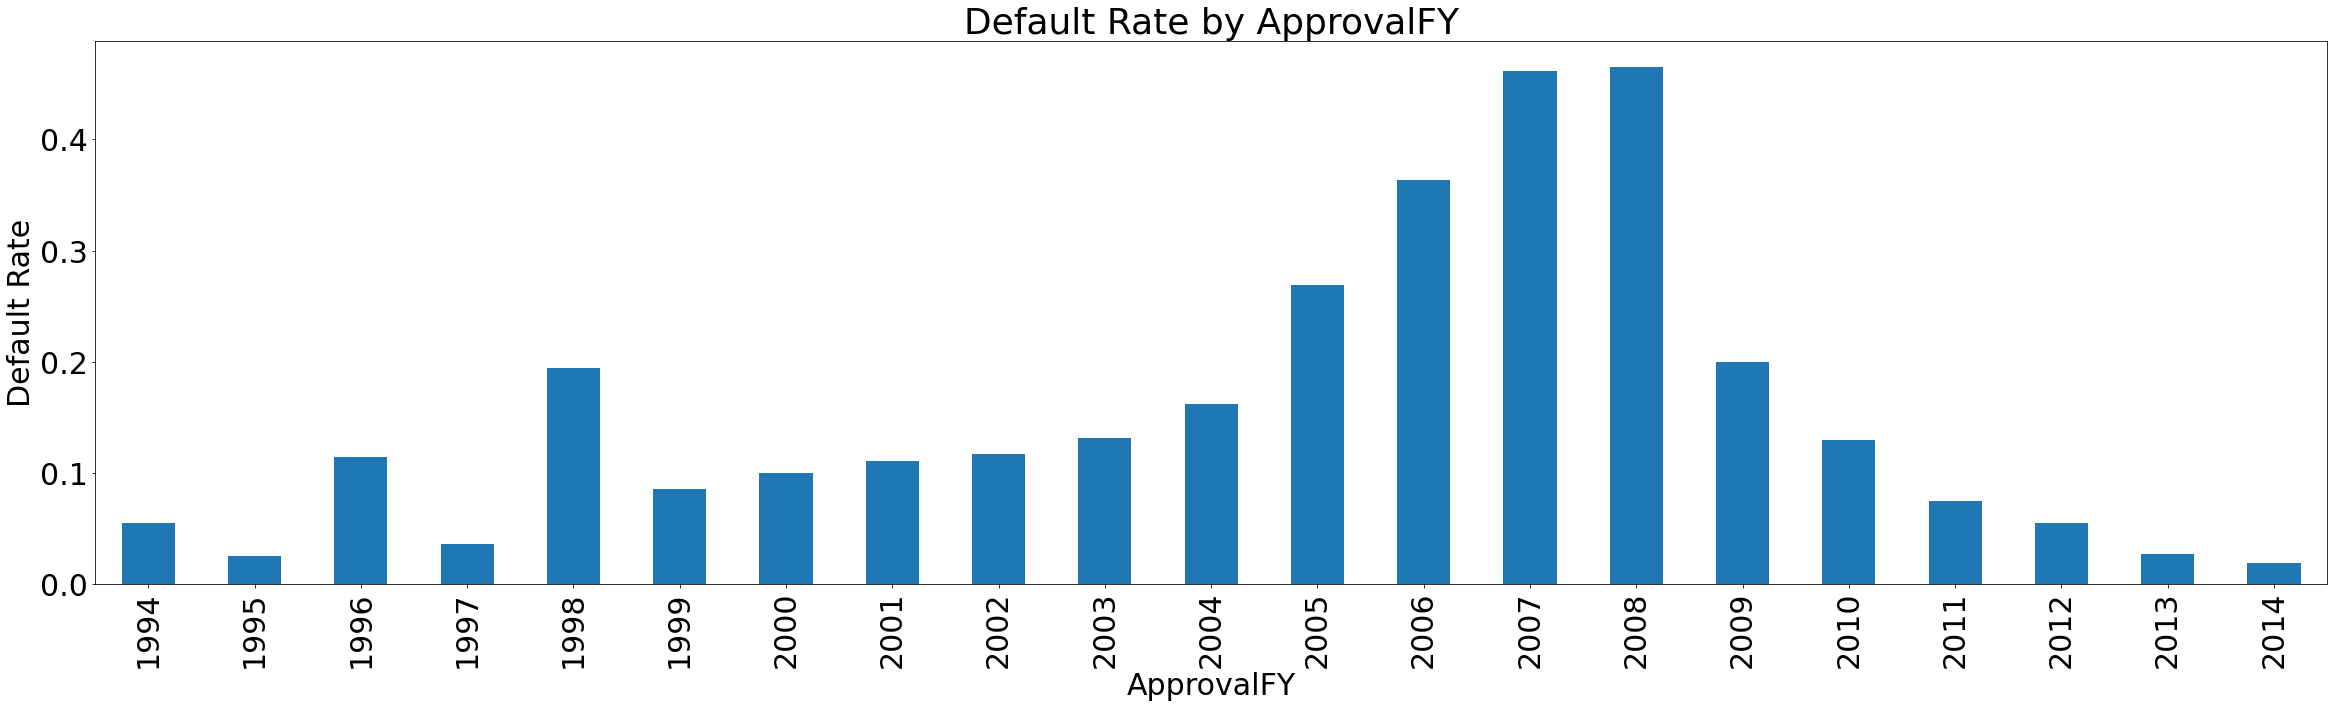

In [57]:
plot_default_rate(SBA_loan_data, 'ApprovalFY', sort_values_greatest_to_least=False)

### Month

Plotting a time of year chart for default rate.

**Insights:** Default rate appears to be fairly consistent across the year.

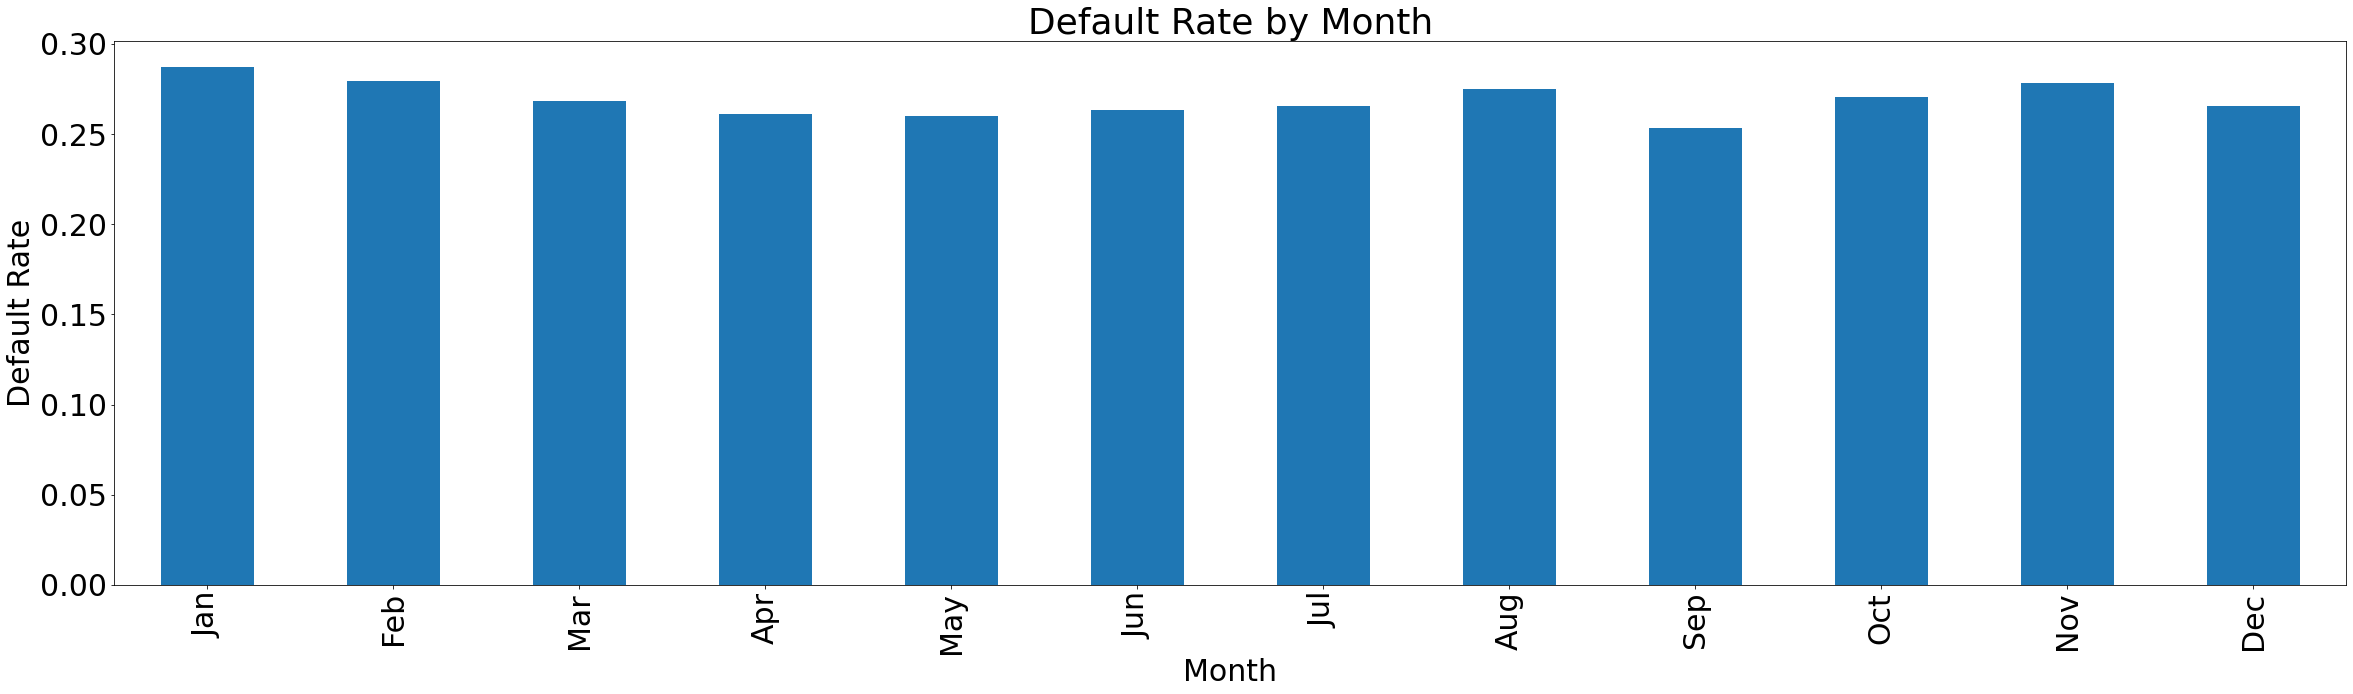

In [58]:
Loans_and_Defaults_by_Month = SBA_loan_data.groupby('Month')[['Month']]\
    .agg('count').rename(columns={'Month': 'Number of Loans by Month'})\
.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']).join(
SBA_loan_data[SBA_loan_data['MIS_Status'] == 1].groupby('Month')[['Month']]\
    .agg('count').rename(columns={'Month': 'Number of Defaults by Month'})\
.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']), how='left'
)

Loans_and_Defaults_by_Month.head()

(Loans_and_Defaults_by_Month['Number of Defaults by Month'] / \
 Loans_and_Defaults_by_Month['Number of Loans by Month'])\
.plot(kind='bar');
plt.title('Default Rate by Month');
plt.ylabel('Default Rate');

<a id='2.4'></a>
## 2.4 Feature Engineering

This section will explore various features I have created, based on the EDA conducted previously, that I believe will be predictive of loan default risk.

1. Time between approval and disbursement (in days): This feature could predict loan default rates because small businesses often have difficulties with cash flow. If a business were to receive the loan long after they have applied and gotten approval for a loan, there are changes the business may have difficulties with operations due to the lack of cash flow. Thus, this may end up resulting in business failure and loan default. <br><br>
2. Percent SBA guarantees: We saw in the EDA that the correlation between the amount SBA gurantees and loan amount is very high. Thus, creating a feature due to this observation may help improve loan default prediction performance. Depending on how much SBA agrees to back a loan, this could affect the risk appetite of the lender (bank). This could in turn secure access to loans for small businesses, as they typically have difficulties in securing loans. On the other hand, this could negatively affect loan defaults given that potentially businesses with poor credit history which previously may not have had a chance at securing a loan now be able to due to SBA's guarantee. <br><br>
3. Retention Rate: Retention rate is typically a symptom of how well a business is performing. If an organization has poor retention rate, this could be a red flag for poor business practices and performance, thus could likely increase loan default risk. <br><br>
4. Borrower in same location as bank: When the borrower and the lender are in the same location, communication is likely improved. With improved communications, there is a higher likelihood that the borrower can pay off their loans. <br><br>
5. Monthly Payment Amount: The amount that the borrower has to pay off to their debtor each month. If the monthly payment is high, then the borrower has a higher chance at default.<br><br>

### Time Between Approval and Disbursement

In [59]:
SBA_loan_data['Time_Between_Approval_and_Disbursement (days)'] = \
(pd.to_datetime(SBA_loan_data['DisbursementDate']) - pd.to_datetime(SBA_loan_data['ApprovalDate'])).dt.days

### Percentage SBA Guarantees

In [60]:
SBA_loan_data['Percent_SBA_Guarantees'] = SBA_loan_data['SBA_Appv'] / SBA_loan_data['GrAppv']

Sanity check to ensure there are no divide by 0 instances

In [61]:
SBA_loan_data['Percent_SBA_Guarantees'].isnull().sum()

0

In [62]:
SBA_loan_data['Percent_SBA_Guarantees'].agg({'max', 'min'})

min    0.05
max    1.00
Name: Percent_SBA_Guarantees, dtype: float64

### Retention Rate

In [63]:
SBA_loan_data['Retention_Rate'] = SBA_loan_data['RetainedJob'] / (SBA_loan_data['RetainedJob'] + SBA_loan_data['CreateJob'])

Finding whether there are divide by 0 instances, and if so, why they occurred.

**Insights:** Given that there are situations where the job creation and retained jobs are both 0, this will create a divide by 0 error. Hence there are many null retention rate values.

In [64]:
SBA_loan_data['Retention_Rate'].agg({'min', 'max'})

min    0.0
max    1.0
Name: Retention_Rate, dtype: float64

In [65]:
SBA_loan_data['Retention_Rate'].isnull().sum()

59369

In [66]:
SBA_loan_data[['RetainedJob', 'CreateJob']][SBA_loan_data['Retention_Rate'].isnull()].head(2)

,RetainedJob,CreateJob
12,0,0
24,0,0


Replacing null values with 0. The reason is because in the above mentioned situation, the retained jobs is 0, hence retention rate is truly 0 despite the divide by 0 issue

In [67]:
SBA_loan_data['Retention_Rate'].fillna(0, inplace=True)

### Borrower in Same State as Bank

In [68]:
SBA_loan_data['Borrower_State_Same_As_Bank'] = (SBA_loan_data['State'] == SBA_loan_data['BankState']).astype(int)

### Monthly Payments

**Important Note:** The reason why the monthly payments is equal to the total gross disbursement if the term length is less or equal to 1 month is that regardless of whether the loan's term length is 2, 3 weeks, etc, the borrower still has to pay that amount in a month. Hence, from a monthly payment perspective, the borrower still has to pay that same amount if the loan term was less than 1 month.

In [69]:
SBA_loan_data['Monthly_Payments'] = \
SBA_loan_data.apply(lambda x: x['DisbursementGross'] if x['Term'] <= 1 else x['DisbursementGross'] / x['Term'], axis=1)

Finding out if there are divide by 0 instances, and if so, why this may be the case.

**Insights:** Because we accounted for the divide by 0 situation by making the monthly payments the same as the total gross disbursement if the term length is less than 1, there are no situations where this will occur as a result.

In [70]:
SBA_loan_data['Monthly_Payments'].agg({'min', 'max'}).apply(lambda x: round(x, 2))

min         27.78
max    2500000.00
Name: Monthly_Payments, dtype: float64

In [71]:
SBA_loan_data['Monthly_Payments'].isnull().sum()

0

<a id='3.0'></a>
# 3.0 Machine Learning Modelling

Importing the necessary libraries for model development

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import shap
from sklearn.preprocessing import RobustScaler

<a id='3.1'></a>
## 3.1 Metric Selection

**True Positives (TP):** A loan is predicted to default and it did default in reality

**True Negatives (TN):** A loan is predicted to not default and it did not default in reality

**False Positives (FP):** A loan is predicted to default when in fact it didn't. In this situation, the loan will be wrongfully denied. This is an issue because business and job opportunities are being unfairly taken away, which could result in a weaker economy.

**False Negatives (FN):** A loan is predicted to not default when in fact it did. This will be detrimental to all parties involved, such as the loss of money for the banks and SBA (depending on how much SBA guaranteed the loan), as well as a black mark on the credit score to the borrower company.

**Accuracy** A measure of percentage of correctly predicted outcomes in comparison to the true outcomes. Equation is (TP+TN)/(TP+TN+FP+FN).

**Precision (P)** A measure of false positives. Equation is TP/(TP+FP). A higher precision corresponds to a lower false positive rate. Thus, precision is very important if we are concerned with minimizing lost business and job opportunities.

**Recall (R)** A measure of false negatives.Equation is TP/(TP+FN). A higher recall corresponds to a lower false negative rate. Thus, recall is an very important if we are concerned with minimizing the detrimental effects of loan defaults.

**F1-score** A balance of the precision and recall metrics. Equation is 2PR/(P+R). An equation to use if neither precision nor recall are deemed as particularily more important than one another.

In our situation, it is difficult to quantify which metric (precision or recall) is more important. If I were in SBA or the borrower's shoes, I may be more inclined to weigh precision with higher importance, as SBA is aware of the fact that small businesses typically have challenges securing loans due to either an insufficient credit history, a lack of capital, or both. Given that SBA exists to support the growth of small businesses, SBA may value precision with higher importance.

However if I were the bank, I will be much more inclined to weigh recall with higher importance as the bank is primarily concerned with whether their borrower can actually pay off the loan. The bank is not nearly as concerned with helping small businesses prosper.

Because I do not belong to either of the three aforementioned parties, I am in a neutral stance. Thus, I believe that f1-score, a more neutral view of the problem, will be the most appropriate. Then accuracy will come secondly as accuracy can be misleading, especially with imbalanced datasets such as what we have seen in the EDA.

<a id='3.2'></a>
## 3.2 Feature Selection and Train, Test, Split

These are the features, based on the EDA conducted earlier, that I believe would be predictive of whether a loan will default or not. One of the features that I have not included in this list is the approval year. The reason is that I believe that features that aren't replicable are not very useful for the model. For instance, there will never be another loan in the future from 2012. Thus, the year cannot be reused again for unseen future data and thus will not be very useful for predictions in a real business setting. Instead another feature that could encapsulate the qualities of the year feature is recession, as recessions tend to be cyclical in nature and will likely happen again in the future. <br><br> Furthermore, the amount SBA guarantees (SBA_Appv) and the amount approved by the bank (GrAppv) are not included in the features list as we have uncovered multicollinearity issues earlier.

In [73]:
features = ['State', 
          'BankState',
          'Recession',
          'Term',
          'NoEmp',
          'CreateJob',
          'UrbanRural',
          'RevLineCr',
          'LowDoc',
          'DisbursementGross',
          'Month',
          'NAICS_SectorName',
          'Borrower_State_Same_As_Bank',
          'Percent_SBA_Guarantees',
          'Franchised_or_Not',
          'Time_Between_Approval_and_Disbursement (days)',
          'Is_New_Business',
          'Retention_Rate',
          'Monthly_Payments'
         ]

X = pd.get_dummies(SBA_loan_data[features], drop_first=True)

y = SBA_loan_data['MIS_Status']

Seeing what the columns look like

In [74]:
list(X.columns)

['Recession',
 'Term',
 'NoEmp',
 'CreateJob',
 'UrbanRural',
 'RevLineCr',
 'LowDoc',
 'DisbursementGross',
 'Borrower_State_Same_As_Bank',
 'Percent_SBA_Guarantees',
 'Franchised_or_Not',
 'Time_Between_Approval_and_Disbursement (days)',
 'Is_New_Business',
 'Retention_Rate',
 'Monthly_Payments',
 'State_AL',
 'State_AR',
 'State_AZ',
 'State_CA',
 'State_CO',
 'State_CT',
 'State_DC',
 'State_DE',
 'State_FL',
 'State_GA',
 'State_HI',
 'State_IA',
 'State_ID',
 'State_IL',
 'State_IN',
 'State_KS',
 'State_KY',
 'State_LA',
 'State_MA',
 'State_MD',
 'State_ME',
 'State_MI',
 'State_MN',
 'State_MO',
 'State_MS',
 'State_MT',
 'State_NC',
 'State_ND',
 'State_NE',
 'State_NH',
 'State_NJ',
 'State_NM',
 'State_NV',
 'State_NY',
 'State_OH',
 'State_OK',
 'State_OR',
 'State_PA',
 'State_RI',
 'State_SC',
 'State_SD',
 'State_TN',
 'State_TX',
 'State_UT',
 'State_VA',
 'State_VT',
 'State_WA',
 'State_WI',
 'State_WV',
 'State_WY',
 'BankState_AL',
 'BankState_AN',
 'BankState_AR',

Removing multicollinearity and features that are likely not going to influence default rate.

In [75]:
def remove_multicollinearity_and_unimportant_features(X, y, multicol_threshold, corr_with_label=0):
    
    X_and_y = X.copy()
    
    # Finding correlations between predictor and outputs and sorting from most to least correlated
    X_and_y['label'] = y
    X_corr_with_predictor = X_and_y.corr().abs()['label']
    X_corr_with_predictor = X_corr_with_predictor.sort_values(ascending=False)
    
    # Removing variables that do not have an absolute correlation with the label above a defined threshold 
    # (default is set to 0). This step is to remove unimportant/irrelevant features to speed up computation speed
    X_corr_with_predictor = X_corr_with_predictor[X_corr_with_predictor >= corr_with_label]
    
    # Dropping the label so that the label does not end up in the predictor variables
    X_corr_with_predictor.drop(index=['label'], inplace=True)
    X_and_y.drop(columns=['label'], inplace=True)
    
    # Reshuffling predictor columns based on most to least correlated with output variable so that when dropping features
    # with high multicollinearity, we don't end up dropping the more important feature.
    X_reshuffled = X_and_y.loc[:, X_corr_with_predictor.index]

    # Create correlation matrix
    corr_matrix = X_reshuffled.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > multicol_threshold)]
    print(f'To drop columns are {to_drop}')
    
    # Drop features 
    X_reshuffled.drop(to_drop, axis=1, inplace=True)
    
    return X_reshuffled

In [76]:
multicol_threshold = 0.7 # The absolute value of 0.7 is the cutoff for a strong linear relationship
corr_with_label = 0.05 # Only return features that have an absolute correlation with the label of at least a certain value
X_no_multicollinearity = remove_multicollinearity_and_unimportant_features(X, y, multicol_threshold, corr_with_label)
X_no_multicollinearity.head(2)

To drop columns are []


`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,Term,Borrower_State_Same_As_Bank,Time_Between_Approval_and_Disbursement (days),DisbursementGross,BankState_VA,Retention_Rate,NAICS_SectorName_Health Care & Social Assistance,BankState_CA,Percent_SBA_Guarantees,Monthly_Payments,UrbanRural,State_CA,State_FL
12,162,0,52,253400.0,0,0.0,0,0,0.75,1564.197531,0.0,0,0
24,126,0,82,137300.0,0,0.0,0,0,0.85,1089.682540,0.0,0,0


Creating train test split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_no_multicollinearity, y, test_size=0.20, random_state=42)

<a id='3.3'></a>
## 3.3 Model Development

I have decided to developed various models for binary dependent variables (in our case predicting whether a loan will default). The models I developed were logistic regression and decision tree classifiers. KNN was avoided as the large number of rows and columns will mean KNN will take a very long time to converge. The same reason is also why I did not use SVMs. As for ensembling methods, I used random forests and xgboost due to how commonly these two ensembling techniques (bagging and boosting) are used in industry respectively. Finally, I used a neural network to determine if it can improve model performance further.

<a id='3.3.1'></a>
### 3.3.1 Logistic Regression

Running a logistic regression model, a commonly used regression based model for binary outcomes.

Using Grid Search for Hyperparameter Tuning. Setting up model, hyperparameters, and Pipeline for **Logistic Regression**

**Important Note 1:** These hyperparameters were chosen to minimize overfitting. The C hyperparameter regularizes the features to avoid overfitting.

**Important Note 2:** I have experimented with running the Logistic Regression model both using and **not using** random oversampling. I have found that although accuracy increases by roughly 3% without oversampling, the f1 score drops by nearly 5%. Because the drop in the f1 score is higher than the increase in the accuracy score, I believe that using Random Oversampler will improve the model performance. Hence, random oversampling is used in the model pipeline.

In [90]:
LR_model = LogisticRegression(n_jobs=-1, random_state=42)

pipe = Pipeline([
    ('scaler', RobustScaler()), # Feature scaling enables more accurate coefficients for logistic regression models
    ('ROS', RandomOverSampler(random_state=42)),
    ('model', LR_model)
])

parameters = {
    'model__max_iter': [50, 100, 200],
    'model__C': [1, 0.1, 0.01]
}


Running the grid search algorithm based on the pipeline and model hyperparameters we set up

**Important Note:** For this problem, as the dataset is imbalanced, I am interested in optimizing the f1, rather than the accuracy score.

In [91]:
gs = GridSearchCV(pipe, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('ROS',
                                        RandomOverSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(n_jobs=-1,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [1, 0.1, 0.01],
                         'model__max_iter': [50, 100, 200]},
             scoring='f1', verbose=2)

Getting the optimal hyperparameters for this model and problem.

**Insights:** Given that the optimal hyperparameters consist of the lowest C value, this suggests that the model has a tendency to overfit and that a lower C value, which corresponds to a higher regularization penalty improves the model performance on the test set the most.

In [92]:
gs.best_params_

{'model__C': 0.01, 'model__max_iter': 100}

Printing model performance for all the hyperparameters combinations in the grid search. Used to understand trends in model performance given different combinations of hyperparameters.

In [93]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.613871,0.288567,0.087992,0.005059,1,50,"{'model__C': 1, 'model__max_iter': 50}",0.674077,0.674176,0.674826,0.672812,0.678348,0.674848,0.001868,9
1,6.429792,0.786098,0.086392,0.003200,1,100,"{'model__C': 1, 'model__max_iter': 100}",0.674077,0.674195,0.675404,0.673257,0.678329,0.675052,0.001776,7
2,6.557781,0.757818,0.083194,0.003918,1,200,"{'model__C': 1, 'model__max_iter': 200}",0.674077,0.674195,0.675404,0.673257,0.678329,0.675052,0.001776,7
3,5.757855,0.362054,0.079995,0.005061,0.1,50,"{'model__C': 0.1, 'model__max_iter': 50}",0.674319,0.674306,0.675196,0.673681,0.678401,0.675181,0.001681,6
4,6.274607,0.916777,0.079994,0.007153,0.1,100,"{'model__C': 0.1, 'model__max_iter': 100}",0.674319,0.674306,0.675590,0.673681,0.678385,0.675256,0.001683,4
5,6.068225,0.830634,0.079996,0.005059,0.1,200,"{'model__C': 0.1, 'model__max_iter': 200}",0.674319,0.674306,0.675590,0.673681,0.678385,0.675256,0.001683,4
6,5.487480,0.141750,0.081592,0.003198,0.01,50,"{'model__C': 0.01, 'model__max_iter': 50}",0.676665,0.676391,0.677849,0.675746,0.680640,0.677458,0.001731,3
7,6.023430,0.740161,0.079995,0.008763,0.01,100,"{'model__C': 0.01, 'model__max_iter': 100}",0.676665,0.676391,0.678168,0.676008,0.680678,0.677582,0.001713,1
8,5.214379,0.473922,0.046399,0.007834,0.01,200,"{'model__C': 0.01, 'model__max_iter': 200}",0.676665,0.676391,0.678168,0.676008,0.680678,0.677582,0.001713,1


Creating a final model based on grid search's best parameters. Then we generate the predicted y values for the test set.

In [94]:
LR_model = LogisticRegression(C=gs.best_params_['model__C'], 
                         max_iter=gs.best_params_['model__max_iter'],
                            random_state=42,
                        n_jobs=-1)

# Feature scaling (necessary for logistic regression algorithms)
scaler = RobustScaler() # Robust scaler is used as we have observed in the EDA that there are severe outliers in the dataset
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Running the model with random oversampling
ros = RandomOverSampler(random_state=42)
X_resampled_scaled, y_resampled = ros.fit_resample(scaled_X_train, y_train)
LR_model.fit(X_resampled_scaled, y_resampled)

y_pred = LR_model.predict(scaled_X_test)

Calculating Final Test Scores (seeing if overfitting)

**Insights:** The f1 and accuracy score are not stellar, but still decent. However, the precision score is of concern given that 42 out of 100 loans will be miscorrectly predicted to default when in fact they will not. This will negatively affect 4 businesses for every 10 loan applications as these businesses will be wrongfully denied of the loan opportunity.

In [95]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9193    0.7803    0.8441     50868
           1     0.5787    0.8151    0.6769     18840

    accuracy                         0.7897     69708
   macro avg     0.7490    0.7977    0.7605     69708
weighted avg     0.8273    0.7897    0.7989     69708



<a id='3.3.2'></a>
### 3.3.2 Decision Tree Classifier

Running a decision tree classifier, a commonly used tree based model to see if we can improve the precision, recall, and f1 score, as the logistic regression model did not perform that well.

Grid Search Hyperparameter Tuning. Setting up model, hyperparameters, and Pipeline for **Decision Tree**

**Important Note 1:** Tree based models are insensitive to scaling, hence feature scaling is not necessary for the pipeline and model

**Important Note 2:** From previous runs with this model, it was determined that the decision tree classifier algorithm performs better without random oversampling, with both the f1 and accuracy score performing nearly 0.5% better than if oversampling were used. Hence, no random oversampling will be used.

**Important Note 3:** Because decision trees are very prone to overfitting, the max depth and min samples split hyperparameters serve to minimize overfitting.

In [96]:
DT_model = DecisionTreeClassifier(random_state=42)

pipe = Pipeline([ 
    ('model', DT_model)
])

parameters = {
    'model__max_depth':  [5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10]
}

Running the grid search algorithm based on the pipeline and model hyperparameters we set up

**Important Note:** For this problem, as the dataset is imbalanced, I am interested in optimizing the f1, rather than the accuracy score.

In [97]:
gs = GridSearchCV(pipe, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 10, 15, 20],
                         'model__min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=2)

Getting the optimal hyperparameters for this model and problem. 

**Insights:** Given that the optimal maximum depth is 15, which lies in between 5 and 20, this suggests that a maximum depth of over 15 will overfit the model, which is a common issue for decision trees, while a maximum depth of under 15 will underfit it. Furthermore, given that the optimal min samples split is 10, the highest value in the grid search parameters, this also suggests that decision trees have a tendency to overfit as increasing the minimum samples before splitting is another measure used to address overfitting in decision trees.

In [98]:
gs.best_params_

{'model__max_depth': 15, 'model__min_samples_split': 10}

Printing model performance for all the hyperparameters combinations in the grid search. Used to understand trends in model performance given different combinations of hyperparameters.

In [99]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.116688,0.010846,0.049595,0.003200,5,2,"{'model__max_depth': 5, 'model__min_samples_sp...",0.801986,0.791828,0.792216,0.787568,0.801426,0.795005,0.005712,10
1,1.155089,0.083223,0.052796,0.003918,5,5,"{'model__max_depth': 5, 'model__min_samples_sp...",0.801986,0.791828,0.792216,0.787568,0.801426,0.795005,0.005712,10
2,1.276680,0.113195,0.052796,0.006399,5,10,"{'model__max_depth': 5, 'model__min_samples_sp...",0.801986,0.791828,0.792216,0.787568,0.801426,0.795005,0.005712,10
3,1.956616,0.032236,0.051196,0.006400,10,2,"{'model__max_depth': 10, 'model__min_samples_s...",0.867619,0.868667,0.869739,0.854552,0.864639,0.865043,0.005514,4
4,1.931017,0.011972,0.055995,0.008762,10,5,"{'model__max_depth': 10, 'model__min_samples_s...",0.867602,0.868753,0.869843,0.855004,0.864773,0.865195,0.005368,2
5,1.921418,0.033329,0.055997,0.007156,10,10,"{'model__max_depth': 10, 'model__min_samples_s...",0.867821,0.868615,0.869667,0.854948,0.864753,0.865160,0.005363,3
6,2.530959,0.050743,0.052795,0.003919,15,2,"{'model__max_depth': 15, 'model__min_samples_s...",0.866254,0.866052,0.866993,0.859480,0.865423,0.864840,0.002727,6
7,2.575759,0.120043,0.089591,0.051447,15,5,"{'model__max_depth': 15, 'model__min_samples_s...",0.865197,0.866088,0.866920,0.860844,0.866026,0.865015,0.002156,5
8,4.450782,0.021816,0.062392,0.003199,15,10,"{'model__max_depth': 15, 'model__min_samples_s...",0.867261,0.866814,0.867480,0.861503,0.867130,0.866037,0.002278,1
9,3.919630,0.966394,0.055996,0.000001,20,2,"{'model__max_depth': 20, 'model__min_samples_s...",0.846895,0.847999,0.850203,0.846446,0.847974,0.847903,0.001299,9


Creating a final model based on grid search's best parameters. Then we generate the predicted y values for the test set.

In [100]:
DT_model = DecisionTreeClassifier(max_depth=gs.best_params_['model__max_depth'],
                             min_samples_split=gs.best_params_['model__min_samples_split'],
                               random_state=42)

DT_model.fit(X_train, y_train)

y_pred = DT_model.predict(X_test)

Calculating Final Test Scores (seeing if overfitting)

**Insights:** All the scores (precision, recall, f1, and accuracy) perform much better than the logistic regression algorithm. This suggests that this particular problem may be better suited to tree algorithms.

In [101]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9540    0.9518    0.9529     50868
           1     0.8705    0.8760    0.8732     18840

    accuracy                         0.9313     69708
   macro avg     0.9123    0.9139    0.9130     69708
weighted avg     0.9314    0.9313    0.9313     69708



<a id='3.3.3'></a>
### 3.3.3 Random Forest Classifier

Running a random forest classifier, a commonly used bagging ensembling technique to see if we can improve the precision, recall, and f1 score even further.

First, we set up the code so that we can use grid search to hyperparameter tune. 

**Important Note 1:** Random forest performs better with random oversampling, with an improvement of around 1% in the f1 score and 0.25% in the accuracy. Hence, random oversampling is used in the model pipeline.

**Important Note 2:** Because random forest is a bagging algorithm, one of its clear benefits is to address the overfitting issues commonly seen in the decision tree algorithm. One of its defining techniques is to sample features for each tree. There's two ways to sample the maximum number of features. Auto (aka. Square Root (n features)) or log (n features). Finding out the best way to sample features would likely improve the performance of this model, hence why I used max features as a hyperparameter.

**Important Note 3:** Hyperparameter tuning for random forests could take a while to run as it is building 100X2X5=1000 different decision trees (100 estimators) X (2 hyperparameters) X (5 folds for cross validation). 

In [102]:
RF_model = RandomForestClassifier(random_state=42,
                                n_jobs=-1)

pipe = Pipeline([
    ('ROS', RandomOverSampler(random_state=42)), 
    ('model', RF_model)
])

parameters = {
    'model__max_features': ['auto', 'log2']
}

Running the grid search algorithm based on the pipeline and model hyperparameters we set up

**Important Note:** For this problem, as the dataset is imbalanced, I am interested in optimizing the f1, rather than the accuracy score.

In [103]:
gs = GridSearchCV(pipe, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ROS',
                                        RandomOverSampler(random_state=42)),
                                       ('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1, param_grid={'model__max_features': ['auto', 'log2']},
             scoring='f1', verbose=2)

Identifying the best hyperparameters

In [104]:
gs.best_params_

{'model__max_features': 'auto'}

Printing out the grid search results to see the variations in performance given different hyperparameters

In [105]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,138.087524,1.165504,2.283884,0.211424,auto,{'model__max_features': 'auto'},0.865531,0.865678,0.867772,0.863431,0.865404,0.865563,0.001376,1
1,98.540093,50.354608,1.692026,0.748708,log2,{'model__max_features': 'log2'},0.865531,0.865678,0.867772,0.863431,0.865404,0.865563,0.001376,1


Creating a final model based on grid search's best parameters. Then we generate the predicted y values for the test set.

In [106]:
RF_model = RandomForestClassifier(max_features=gs.best_params_['model__max_features'],
                                random_state=42,
                             n_jobs=-1)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
RF_model.fit(X_resampled, y_resampled)

y_pred = RF_model.predict(X_test)

**Insights:** The random forest algorithm performs similarly to the decision tree. f1-score and accuracy is slightly lower for the random forest in comparison to the decision tree.

In [107]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9550    0.9477    0.9513     50868
           1     0.8617    0.8794    0.8704     18840

    accuracy                         0.9292     69708
   macro avg     0.9083    0.9135    0.9109     69708
weighted avg     0.9298    0.9292    0.9295     69708



<a id='3.3.4'></a>
### 3.3.4 XGBoost

Running an XGBoost model, a commonly used boosting ensembling technique, to see if we can improve the precision, recall, and f1 score even further.

Using Cross Validation to run XGBClassifier to ensure that the good score we observed is not a fluke.

**Important Note:** Given that the vanilla XGBClassifier model performs very well already, there's no need to hyperparameter tune with grid search.

**Insights:** Given that XGBoost algorithm performs better without random oversampling (ROS), with slightly higher f1 and accuracy scores as compared to with ROS. It was found that without ROS, the precision score performs better than with (roughly 5% better), the recall score is worse (roughly 4.5% worse). However, because f1 and accuracy score were both higher, I believe without ROS is the better option for this algorithm to address this specific problem.

In [108]:
XGBoost_model = XGBClassifier(n_jobs=-1, random_state=42)
xgb_f1_scores = cross_val_score(XGBoost_model, X_train, y_train, cv=5, scoring="f1", n_jobs=-1)

**Insights:** XGBClassifier performs extraordinarily well regardless of the data being used as all 5 k-folds have very high f1_scores.

In [114]:
print(f"f1 scores for 5 fold cross validation are {' '.join(list(map(lambda x: str(round(x, 4)), xgb_f1_scores)))}")
print(f'Mean cross validation score is {round(xgb_f1_scores.mean(), 4)}')

f1 scores for 5 fold cross validation are 0.885 0.8866 0.8872 0.8858 0.8837
Mean cross validation score is 0.8857


Creating a final model. Then we generate the predicted y values for the test set.

In [115]:
XGBoost_model = XGBClassifier(n_jobs=-1, random_state=42)

XGBoost_model.fit(X_train, y_train)

y_pred = XGBoost_model.predict(X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[11:08:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBoost, in comparison to the other 4 models we have tried, is by far the best in terms of f1 score and accuracy.

In [116]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9594    0.9580    0.9587     50868
           1     0.8871    0.8905    0.8888     18840

    accuracy                         0.9398     69708
   macro avg     0.9232    0.9243    0.9237     69708
weighted avg     0.9398    0.9398    0.9398     69708



<a id='3.3.5'></a>
### 3.3.5 Neural Networks

Using neural networks, another method to predict binary outcomes, to see if we can improve the precision, recall, and f1 score even further.

Installing the libraries for the neural network architecture and model. Only run the !pip install tensorflow if you haven't had tensorflow installed yet. It takes quite a long time to install.

In [294]:
#!pip install tensorflow

In [117]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation

Preparing the data for the model. 

**Insights:** It has been found that not random oversampling has improved the model's accuracy by roughly 0.75%. Thus, random oversampling will not be used for this model.

In [118]:
# Feature scaling (important for neural networks as it enables faster convergence as well as treating each variable equally)
scaler = RobustScaler() # Robust scaler is used as we have found outlier values during EDA.
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

Creating the model architecture for the deep learning model.

**Important Note:** I have used a relu activation functions for the layers as I have found that has improved model performance. I have also created two hidden layers of 50 units each so that the model can learn from the various patterns in the dataset's features. I have used dropout regularization to address potential overfitting issues. The output variable is binary, hence a dense layer with 1 unit using the sigmoid activation function.

In [119]:
NN_model = Sequential()
NN_model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(Dense(50, activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(Dense(1, activation='sigmoid'))

**Important Note:** I have used the binary crossentropy loss function as our output is binary (whether the loan defaults or not). I have used the adam optimizer to speed up the algorithm. Finally, I have used the accuracy metric as the f-beta metrics appear to have been scrapped.

In [120]:
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Running the model.

**Important Note:** I have decided to use 50 epochs using mini batch gradient descent. The reason I chose the particular batch size is that it is a power of 2. I decided not to use SGD because the model may be very noisy and unstable during the convergence process, which could affect the model interpretation and accuracy of the accuracy score. At the same time, I did not use batch gradient descent because it would take a very long time for the model to converge to the minima when nearly 280000 data points are used.

In [121]:
history = NN_model.fit(scaled_X_train, 
                    y_train, 
                    epochs=50,
                    validation_data=(scaled_X_test, y_test), 
                    batch_size=2048,
                   workers=-1)

# Generating predictions
y_pred = NN_model.predict(scaled_X_test)
y_pred = pd.Series(y_pred[:, 0]).apply(lambda x: 1 if x > 0.5 else 0) 

Epoch 1/50
137/137 [==============================] - 1s 6ms/step - loss: 0.5640 - accuracy: 0.7538 - val_loss: 0.4167 - val_accuracy: 0.8226
Epoch 2/50
137/137 [==============================] - 1s 4ms/step - loss: 0.4327 - accuracy: 0.8130 - val_loss: 0.3759 - val_accuracy: 0.8381
Epoch 3/50
137/137 [==============================] - 1s 4ms/step - loss: 0.3992 - accuracy: 0.8248 - val_loss: 0.3622 - val_accuracy: 0.8396
Epoch 4/50
137/137 [==============================] - 1s 4ms/step - loss: 0.3831 - accuracy: 0.8309 - val_loss: 0.3522 - val_accuracy: 0.8422
Epoch 5/50
137/137 [==============================] - 1s 4ms/step - loss: 0.3711 - accuracy: 0.8349 - val_loss: 0.3440 - val_accuracy: 0.8464
Epoch 6/50
137/137 [==============================] - 1s 4ms/step - loss: 0.3621 - accuracy: 0.8389 - val_loss: 0.3380 - val_accuracy: 0.8502
Epoch 7/50
137/137 [==============================] - 1s 4ms/step - loss: 0.3559 - accuracy: 0.8416 - val_loss: 0.3341 - val_accuracy: 0.8521
Epoch 

Calculating Final Test Scores (seeing if overfitting)

**Insights:** Accuracy and f1 score are not bad, performing better than the logistic regression, but underperforms compared to the tree algorithms (decision tree, random forest, XGBoost)

In [122]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8761    0.9383    0.9061     50868
           1     0.7940    0.6416    0.7097     18840

    accuracy                         0.8581     69708
   macro avg     0.8350    0.7900    0.8079     69708
weighted avg     0.8539    0.8581    0.8530     69708



<a id='3.4'></a>
## 3.4 Model Selection

Based on our findings, XGBoost is the best performing model with regards to the f1_score and the accuracy. Thus, we will proceed with this model for the model interpretation.

<a id='3.5'></a>
## 3.5 Model Interpretation for XGBoost

Obtaining the feature importances for the model

**Insights:** The two most important features are whether the borrower is in the same location as bank and the term duration. 

**Term Length:** The term length is the most important feature. This is not too surprising because one of SBA's major objectives is to extend the loan duration so that companies can pay off their loans in a reasonable time frame. A major contribution for loan defaults could be having to pay off a very high loan amount in a short period of time. Most companies struggle with capital and cash flow and may not have the means/capability to pay off soo much money in a tight timeframe. Extending the term length could help a lot with improving the success of paying off loans.

**Same location as Bank:** Having the company in the same state as the bank could impact loan default rates as this is a measure of ease of communication, a crucial factor in doing business that could make or break a company's financial performance. 

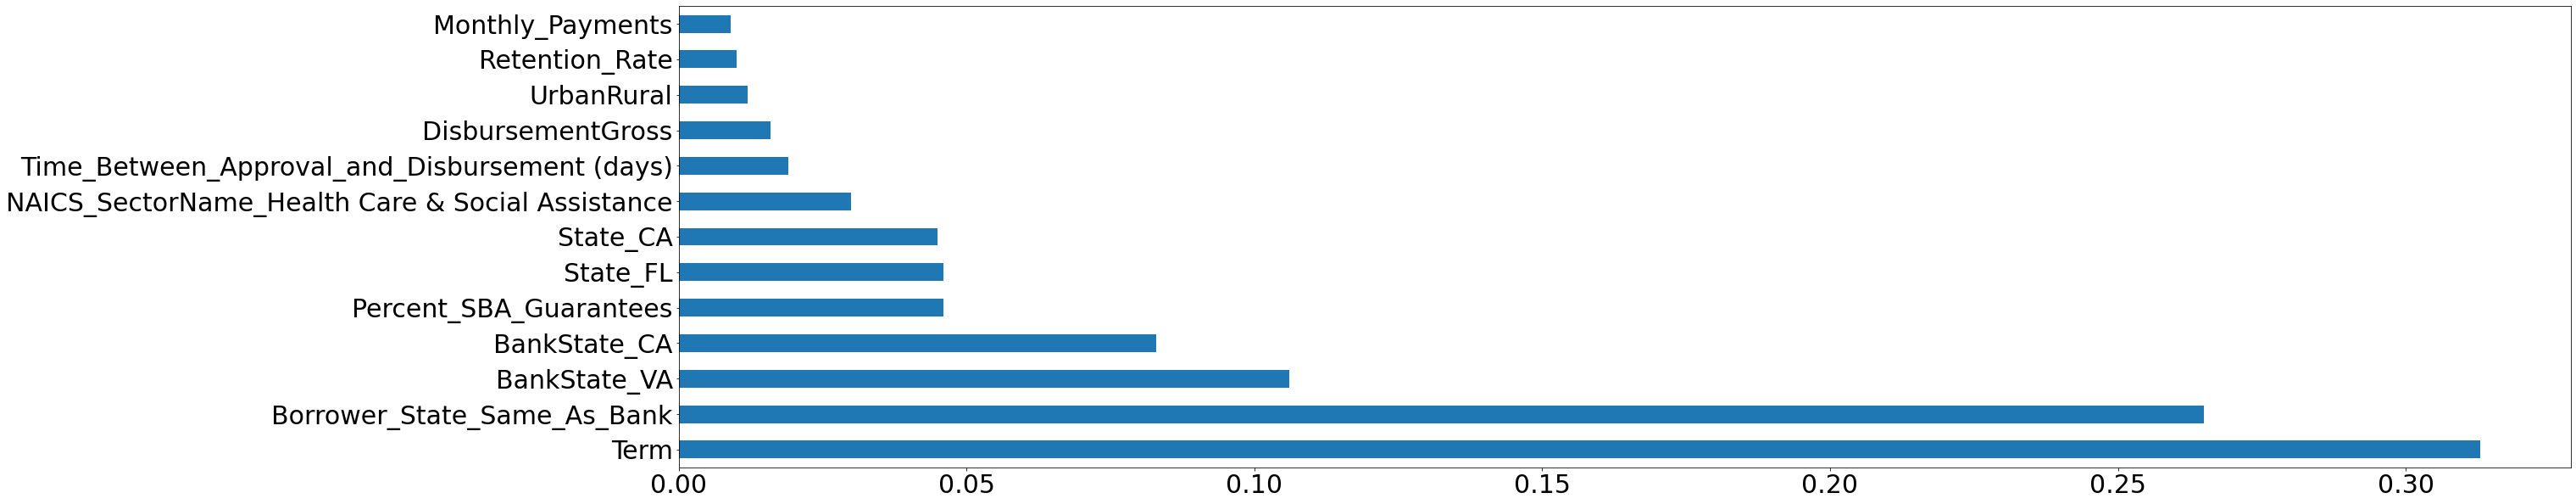

In [123]:
pd.Series(np.around(XGBoost_model.feature_importances_, decimals=3), index=X_train.columns).sort_values(ascending=False)[:20]\
.plot(kind='barh');

<a id='3.5.1'></a>
### 3.5.1 Using SHAP Library for Enriched Model Interpretation

Using a summary plot to understand the overall impact of each feature

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


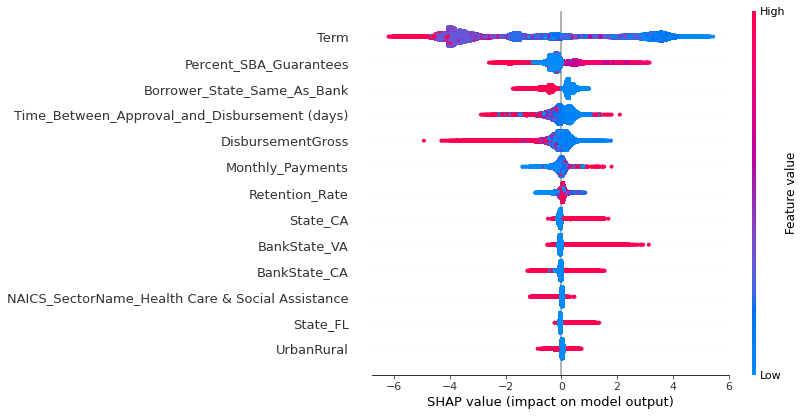

In [124]:
shap.initjs()
explainer = shap.TreeExplainer(XGBoost_model, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)

Analyzing each feature in more detail

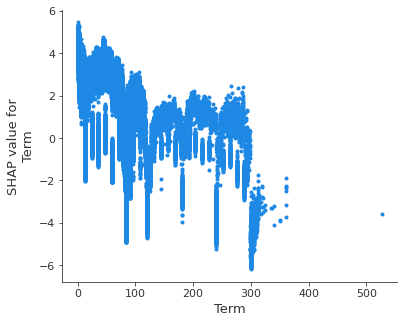

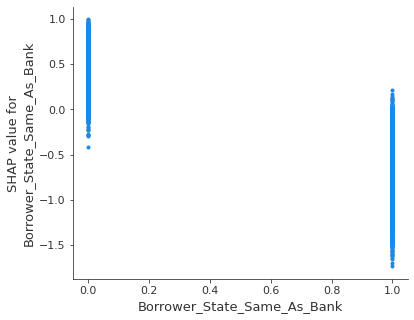

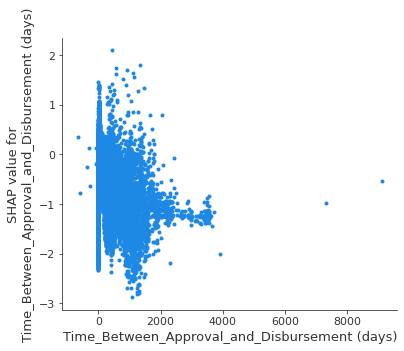

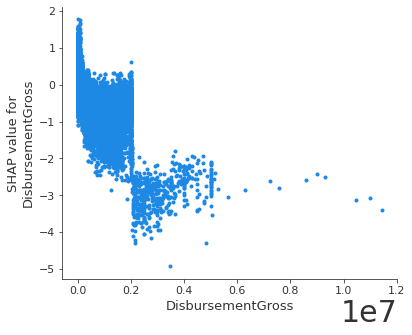

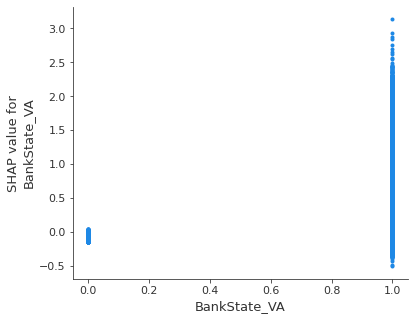

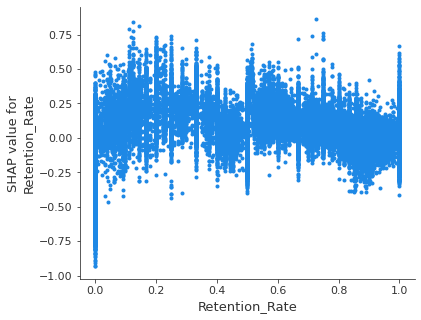

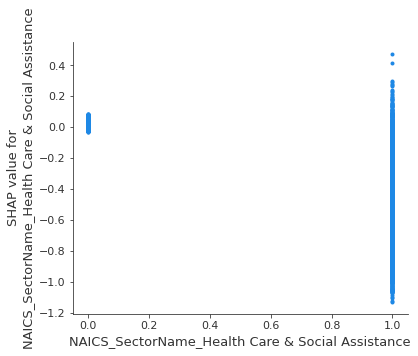

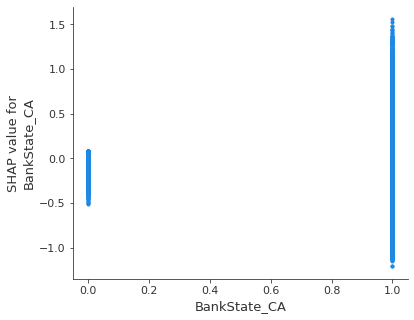

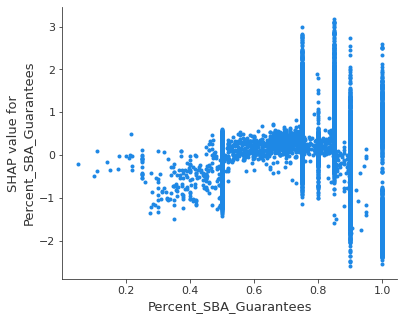

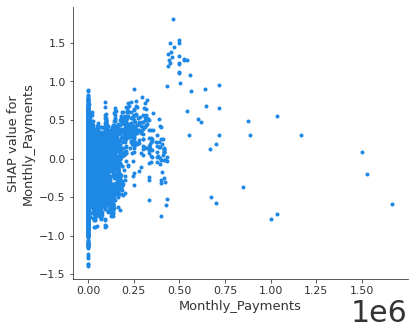

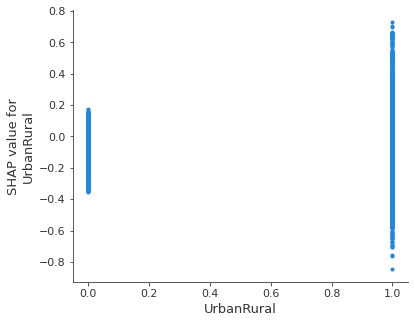

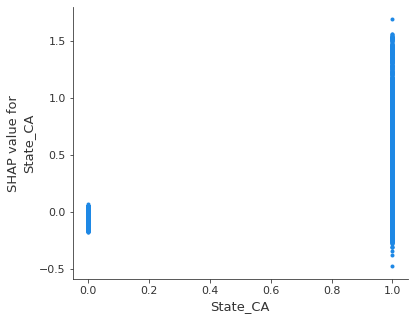

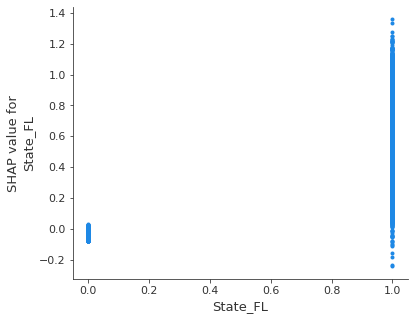

In [125]:
for column in X_train.columns:
    shap.dependence_plot(
        column,
        shap_values,
        X_train[X_train.columns],
        interaction_index=None
    )

<a id='4.0'></a>
# 4.0 Final Insights and Recommendations

<a id='4.1'></a>
## 4.1 Algorithm

The most appropriate models to use are tree based ones, as they have all performed better on all metrics (accuracy, precision, recall, f1_score) compared to the logistic regression and surprisingly, even a neural network. The best performing is XGBoost, suggesting this model is the best suited for predicting loan defaults for US small businesses.

<a id='4.2'></a>
## 4.2 Recommendations Based on Model Interpretation

Based on the SHAP graphs, term length is crucial towards the success rate of paying off loans. Because the term value has a very strong relationship with default risk, as shown in the high negative correlation in the scatter plot between term length and SHAP value as well as the highest feature importance value, long term loans tend to be the most successful. The likely reason could be because longer terms provide more time for the small business to establish itself, break even, and thus be more financially capable of paying off its loans.

Being in the same state as your bank as a small business is also very important to lowering loan default risk. The majority of loans for companies that are in the same state as their banks have a low SHAP value vice versa. Furthermore, this feature has the second highest feature importance value. Given these findings, it would be highly advisable to choose a bank in the same state if you were a small business. This could be due to improved communications, an essential ingredient for business success.

Having your business in California and Florida, all other factors being equal, will increase loan default risk, due to the high SHAP values where California and Florida are equal to 1. This could be due to other factors that have not been accounted in the model, such as the fact that California is home to one of the largest tech startup ecosystems in the world. Given that this industry is notorious for having a high rate of failure, this unaccounted variable could be skewing the findings against California.

Being in the health and social insurance industry will likely reduce default risk as SHAP values are mostly negative for loans in this industry. This makes sense as this industry has promising futures, as the US population is aging and that healthcare is essential no matter what the economic circumstances are. Thus, if an entrepreneur were to start a business and wants to minimize default risk, the best industry to target would be the health and social insurance industry.

Monthly payments, as expected, has a positive relationship with default risk, denoted by the fact that high feature values typically have high SHAP values. As explored earlier in the feature engineering section, high monthly payments are very difficult for small businesses to manage because small businesses typically have difficulties with cash flow, breaking even, and making steady profits. Therefore, SBA's ability to extend the term length is very important for the borrower to pay off their loans as extending the term length will reduce the monthly payments for the borrower. However, monthly payments is not as important as term length, as monthly payments has the lowest relative feature importance while term length has the highest.

One interesting finding is that gross disbursement amount is negatively correlated with default risk, as denoted by the correlation in the scatter plot between disbursement amount and SHAP values. The reason why this occurred is likely because bigger loans undergo a more rigorous background check. Thus, large loans that get approved tend to be given to businesses who are more likely of paying them off. This suggests that bigger loans have a lower default risk, but only likely due to the fact that strict background checks tend to be conducted.

<a id='4.3'></a>
## 4.3 Considerations

Because this dataset only has data up to 2014, some of these findings as well as the model may not perform very well if it were used today, given that the economic landscape has changed dramatically over the past 8 years. Thus, if more recent data regarding this problem were to be published on Kaggle, this could improve the practicality and applicability of the model.